#¿Cómo dibujar mapas estáticos con R?

Ya que gran parte de la información del INE hace referencia a territorios geográficos (España, CCAA, provincias o municipios), emplear mapas es una manera idónea de mostrar los datos. Así, en este cuaderno, explicamos cómo realizar mapas estáticos en R.

A diferencia de los mapas interactivos - que en otros cuadernos se explica cómo crearlos -, los mapas estáticos no muestran información adicional al pasar el cursor por encima de ellos. Sin embargo, resultan muy útiles a la hora de realizar presentaciones en Power Point o plataformas similares, ya que nos los podremos descargar en formato *.png* o *.jpg* e insertarlos fácilmente como imágenes.

Los principales apartados de este cuaderno son:
1. **Cómo cargar la información necesaria para hacer mapas.**
2. **Cómo crear un mapa estático básico, pero completo.**
3. **Cómo acercar las islas Canarias a la península Ibérica.**
4. **Cómo dibujar un mapa al lado de otro.**
5. **Cómo añadir más capas a un mapa.**

###Librerías básicas a utilizar

`ggplot2` es la librería de R que nos permite realizar mapas estáticos. Pero, antes de graficarlos, debemos cargar la información geográfica. Para ello disponemos de dos opciones: la librería `sf` y la librería `rgdal`. La carga de las librerías tarda unos 10 min, debido, principalmente, a la carga de dependencias que requiere la librería `sf`.

ATENCIÓN: está previsto que la librería `rgdal` deje de funcionar a finales de 2023, por lo que si estás leyendo este cuaderno en 2024 o después, es muy probable que dé error `rgdal` y solo puedas utilizar la librería `sf`.

In [ ]:
#Primera librería leer los archivos .shp (información geográfica)
install.packages("rgdal")
library(rgdal)
#Segunda librería para leer los archivos .shp (información geográfica) [Las líneas de código adicionales son necesarias para solucionar un problema que surger al cargar ciertas dependencias de la libreria sf en Colab]
system("apt-get -y update")
system("apt-get install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev")
install.packages("sf")
library(sf)
#Para convertir las capas en dataframe:
install.packages("broom")
library(broom)
#Megalibrería para manejar dataframes y realizar gráficos, incluidos mapas (contiene las librerías dplyr y ggplot2):
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Loading required package: sp

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-32, (SVN revision 1176)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.5-0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3; sf_use_s2() is TRUE

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘l

###Cargamos la información geográfica


Una de las formas más habituales de utilizar información geográfica es mediante archivos *shapefile* (*.shp*). Este tipo de archivos es el formato estrella en Sistemas de Información Geográfica (SIG) como ArcGIS o QGIS.

Podemos leer este tipo de archivos con R, de la siguiente forma usando el paquete `rgdal` (ocurriría lo mismo si usáramos `sf`):
```
mapa = rgdal::read_OGR("mapa_provincias.shp")
```

Sin embargo, si leemos solamente un archivo *.shp* se producirá el siguiente error:
```
Error in ogrListLayers(dsn = dsn): Cannot open data source
Traceback:

1. readOGR("/content/recintos_provinciales_inspire_peninbal_etrs89.shp")
2. ogrListLayers(dsn = dsn)
```
Dicho error se debe a que al llamar a un archivo *.shp*, en realidad, R no solo está llamando a dicho archivo, sino a todos los archivos que estaban dentro de la misma carpeta *.zip* que descargamos (archivos *.shx*, *.dbf*, *.sbn*, etc). Entonces, para evitar este error, debemos tener todos esos archivos cargados en *Colab*, pese a solo llamar directamente al archivo *.shp*.

Por lo tanto, debemos cargar en Colab todos los archivos referentes a la capa geográfica. Para hacer esto, podemos cargar los archivos manualmente desde un repositorio local o conectarnos a nuestra cuenta de Google Drive y descargar desde allí los archivos. Como se explica en el cuaderno [Subir archivos a Colab desde repositorio local o Google Drive usando Python o R](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Pildoras/Subir%20archivos%20a%20Colab%20desde%20repositorio%20local%20o%20Google%20Drive%20usando%20Python%20o%20R.ipynb) resulta bastante más sencillo realizar la carga manual desde un repositorio local y, sobre todo, es más eficiente cuando utilizamos R en Colab (pues, al contrario que al conectarnos a Drive, se pueden cargar varios archivos a la vez). Entonces, usaremos dicho método:
1. Clicamos en el icono de la derecha de la pantalla que tiene forma de carpeta y se abre un desplegable a su derecha.
2. Clicamos en el icono que nos muestra una carpeta con una flecha hacia arriba en su interior.
3. Se abrirá una carpeta para que busquemos el archivo. Una vez seleccionado, le damos a "Abrir". (Como podemos seleccionar varios archivos a la vez, se recomienda seleccionar todos los que estaban dentro de la carpeta *.zip*, y luego darle a "Abrir"). 
4. Esperamos a que se cargue y, una vez cargado, ya podemos usar la función de R apropiada para leer dicho archivo (en este caso, la función `readOGR` de la librería `rgdal`).


Las capas shapefile que vamos a utilizar las vamos a descargar de la página web del [Instituto Geográfico Nacional](http://centrodedescargas.cnig.es/CentroDescargas/buscar.do?filtro.codFamilia=LILIM&filtro.codCA=11#)

Nos descargaremos una carpeta *.zip* que, a su vez, contendrá otras carpetas con la información de los límites geográficos de la España peninsular, Islas Baleares, Ceuta y Melilla (carpeta *SHP_ETRS89*), y de las Islas Canarias (carpeta *SHP_WGS84*). Asimismo, dentro de cada una de esas dos carpetas, tendremos otras con los recintos autonómicos, provinciales y municipales. Utilizaremos las capas de provincias para nuestro ejemplo.

Como el archivo *.shp* para las Islas Canarias es distinto al del resto de España, debemos leer ambos archivos por separado, para, posteriormente, concatenarlos (es decir, juntar ambas tablas una debajo de la otra).

##Utilizamos la librería `rgdal`

En primer lugar, veremos como dibujar mapas empleando la librería `rgdal`:

###Manipulación primaria de los archivos que contienen la información geográfica

Comenzamos en el archivo `.shp` que contiene la información geográfica (coordenadas) de las islas Canarias.

In [ ]:
Canarias_rgdal <- readOGR("recintos_provinciales_inspire_canarias_wgs84.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/content/recintos_provinciales_inspire_canarias_wgs84.shp", layer: "recintos_provinciales_inspire_canarias_wgs84"
with 2 features
It has 9 fields


In [ ]:
class(Canarias_rgdal)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

Al utilizar la función `readOGR` obtenemos un objeto `SpatialPolygonsDataFrame`. Para facilitar su manejo y posibilitar su uso con `ggplot2` debemos convertirlo a un dataframe normal.

In [ ]:
names(Canarias_rgdal)

[1] "INSPIREID"  "COUNTRY"    "NATLEV"     "NATLEVNAME" "NATCODE"   
[6] "NAMEUNIT"   "CODNUT1"    "CODNUT2"    "CODNUT3"

Nuestro `SpatialPolygonsDataFrame` Canarias contiene las anteriores columnas.

In [ ]:
Canarias_rgdal$NAMEUNIT

[1] "Santa Cruz de Tenerife" "Las Palmas"

In [ ]:
Canarias_rgdal$NATCODE

[1] "34053800000" "34053500000"

Las columnas `NAMEUNIT` y `NATCODE` contienen el nombre de las provincias canarias y el código de cada provincia. Sin embargo, se trata de un código largo; no del código de dos dígitos que podemos encontrar al buscar datos en el INE. Dicho código de dos dígitos está incluido en el código largo que tenemos, ocupando las posiciones quinta y sexta.

Una vez sabemos esto, debemos crear un pequeño dataframe con los nombres y códigos provinciales, que nos resultará de gran ayuda poco después:

In [ ]:
nombres_provincias_Canarias_rgdal <- data.frame(Canarias_rgdal$NAMEUNIT, Canarias_rgdal$NATCODE)
head(nombres_provincias_Canarias_rgdal)

,Canarias_rgdal.NAMEUNIT,Canarias_rgdal.NATCODE
,<chr>,<chr>
1,Santa Cruz de Tenerife,34053800000
2,Las Palmas,34053500000


Cambiamos el nombre de las columnas para facilitar posteriores operaciones de unión de tablas:

In [ ]:
nombres_provincias_Canarias_rgdal <- rename(nombres_provincias_Canarias_rgdal, Provincia = Canarias_rgdal.NAMEUNIT)
nombres_provincias_Canarias_rgdal <- rename(nombres_provincias_Canarias_rgdal, Codigo = Canarias_rgdal.NATCODE)

Asimismo, creamos una columna de IDs que nos permitirá unir este pequeño dataframe con los nombres y códigos al dataframe que creemos con la información geográfica:

In [ ]:
nombres_provincias_Canarias_rgdal$id <- as.character(seq(0, nrow(nombres_provincias_Canarias_rgdal)-1))
head(nombres_provincias_Canarias_rgdal)

,Provincia,Codigo,id
,<chr>,<chr>,<chr>
1,Santa Cruz de Tenerife,34053800000,0
2,Las Palmas,34053500000,1


Preparado este pequeño dataframe, convertimos el `SpatialPolygonsDataFrame` en un dataframe normal. Para ello, empleamos la función `tidy` del paquete `broom`:

In [ ]:
Canarias_rgdal <- tidy(Canarias_rgdal)
head(Canarias_rgdal)

Regions defined for each Polygons



long,lat,order,hole,piece,group,id
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>
-16.48177,28.09536,1,FALSE,1,0.1,0
-16.48186,28.09526,2,FALSE,1,0.1,0
-16.48200,28.09509,3,FALSE,1,0.1,0
-16.48214,28.09493,4,FALSE,1,0.1,0
-16.48231,28.09477,5,FALSE,1,0.1,0
-16.48248,28.09463,6,FALSE,1,0.1,0


In [ ]:
class(Canarias_rgdal)

[1] "tbl_df"     "tbl"        "data.frame"

Comprobamos que ahora sí tenemos un `dataframe` normal. No obstante, en este dataframe, tenemos coordenadas de latitud y longitud con las que dibujar el mapa, pero no tenemos el nombre de las provincias, ni el código. Por lo tanto, debemos unir a esta información el pequeño dataframe que creamos anteriormente:

In [ ]:
Canarias_rgdal <- left_join(Canarias_rgdal, nombres_provincias_Canarias_rgdal, by="id")
head(Canarias_rgdal)

long,lat,order,hole,piece,group,id,Provincia,Codigo
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>,<chr>,<chr>
-16.48177,28.09536,1,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000
-16.48186,28.09526,2,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000
-16.48200,28.09509,3,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000
-16.48214,28.09493,4,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000
-16.48231,28.09477,5,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000
-16.48248,28.09463,6,FALSE,1,0.1,0,Santa Cruz de Tenerife,34053800000


Tenemos así un dataframe con la información geográfica y la información identificadora (nombre de provincia y código) de las Canarias.

Repetimos el proceso anterior con la capa del resto de España:

In [ ]:
Resto_Espanna_rgdal <- readOGR("recintos_provinciales_inspire_peninbal_etrs89.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/content/recintos_provinciales_inspire_peninbal_etrs89.shp", layer: "recintos_provinciales_inspire_peninbal_etrs89"
with 51 features
It has 9 fields


In [ ]:
nombres_provincias_Resto_Espanna_rgdal <- data.frame(Resto_Espanna_rgdal$NAMEUNIT, Resto_Espanna_rgdal$NATCODE)
head(nombres_provincias_Resto_Espanna_rgdal)

,Resto_Espanna_rgdal.NAMEUNIT,Resto_Espanna_rgdal.NATCODE
,<chr>,<chr>
1,València/Valencia,34104600000
2,Toledo,34084500000
3,Teruel,34024400000
4,Tarragona,34094300000
5,Soria,34074200000
6,Sevilla,34014100000


In [ ]:
nombres_provincias_Resto_Espanna_rgdal <- rename(nombres_provincias_Resto_Espanna_rgdal, Provincia = Resto_Espanna_rgdal.NAMEUNIT)
nombres_provincias_Resto_Espanna_rgdal <- rename(nombres_provincias_Resto_Espanna_rgdal, Codigo = Resto_Espanna_rgdal.NATCODE)
nombres_provincias_Resto_Espanna_rgdal$id <- as.character(seq(0, nrow(nombres_provincias_Resto_Espanna_rgdal)-1))
head(nombres_provincias_Resto_Espanna_rgdal)

,Provincia,Codigo,id
,<chr>,<chr>,<chr>
1,València/Valencia,34104600000,0
2,Toledo,34084500000,1
3,Teruel,34024400000,2
4,Tarragona,34094300000,3
5,Soria,34074200000,4
6,Sevilla,34014100000,5


In [ ]:
Resto_Espanna_rgdal <- tidy(Resto_Espanna_rgdal)

Regions defined for each Polygons



In [ ]:
Resto_Espanna_rgdal <- left_join(Resto_Espanna_rgdal, nombres_provincias_Resto_Espanna_rgdal, by="id")
head(Resto_Espanna_rgdal)

long,lat,order,hole,piece,group,id,Provincia,Codigo
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>,<chr>,<chr>
-0.4474555,38.81969,1,FALSE,1,0.1,0,València/Valencia,34104600000
-0.4535420,38.81728,2,FALSE,1,0.1,0,València/Valencia,34104600000
-0.4606183,38.81486,3,FALSE,1,0.1,0,València/Valencia,34104600000
-0.4613619,38.81046,4,FALSE,1,0.1,0,València/Valencia,34104600000
-0.4618765,38.80765,5,FALSE,1,0.1,0,València/Valencia,34104600000
-0.4685905,38.80567,6,FALSE,1,0.1,0,València/Valencia,34104600000


Hecho lo anterior, ya tenemos toda la información en dos dataframes con el mismo formato y columnas, por lo que el siguiente paso consiste en unirlos en una sola tabla. Como el nombre y tipo de las columnas es el mismo, vamos a concatenar (por uno debajo del otro) los dataframes: 

In [ ]:
mapa_rgdal <- rbind(Resto_Espanna_rgdal, Canarias_rgdal)

Finalmente, antes de dibujar el mapa, vamos a modificar la columna de códigos provinciales, para quedarnos solamente con el código corto que aparece en la página web del INE (dígitos quinto y sexto del código largo):

In [ ]:
mapa_rgdal$Codigo <- substr(mapa_rgdal$Codigo, start=5, stop=6)
head(mapa_rgdal)

long,lat,order,hole,piece,group,id,Provincia,Codigo
<dbl>,<dbl>,<int>,<lgl>,<fct>,<fct>,<chr>,<chr>,<chr>
-0.4474555,38.81969,1,FALSE,1,0.1,0,València/Valencia,46
-0.4535420,38.81728,2,FALSE,1,0.1,0,València/Valencia,46
-0.4606183,38.81486,3,FALSE,1,0.1,0,València/Valencia,46
-0.4613619,38.81046,4,FALSE,1,0.1,0,València/Valencia,46
-0.4618765,38.80765,5,FALSE,1,0.1,0,València/Valencia,46
-0.4685905,38.80567,6,FALSE,1,0.1,0,València/Valencia,46


###Dibujamos el mapa

Hecho lo anterior, ya podemos representar el mapa. Eso sí, todavía será un mapa sin ningún tipo de información:

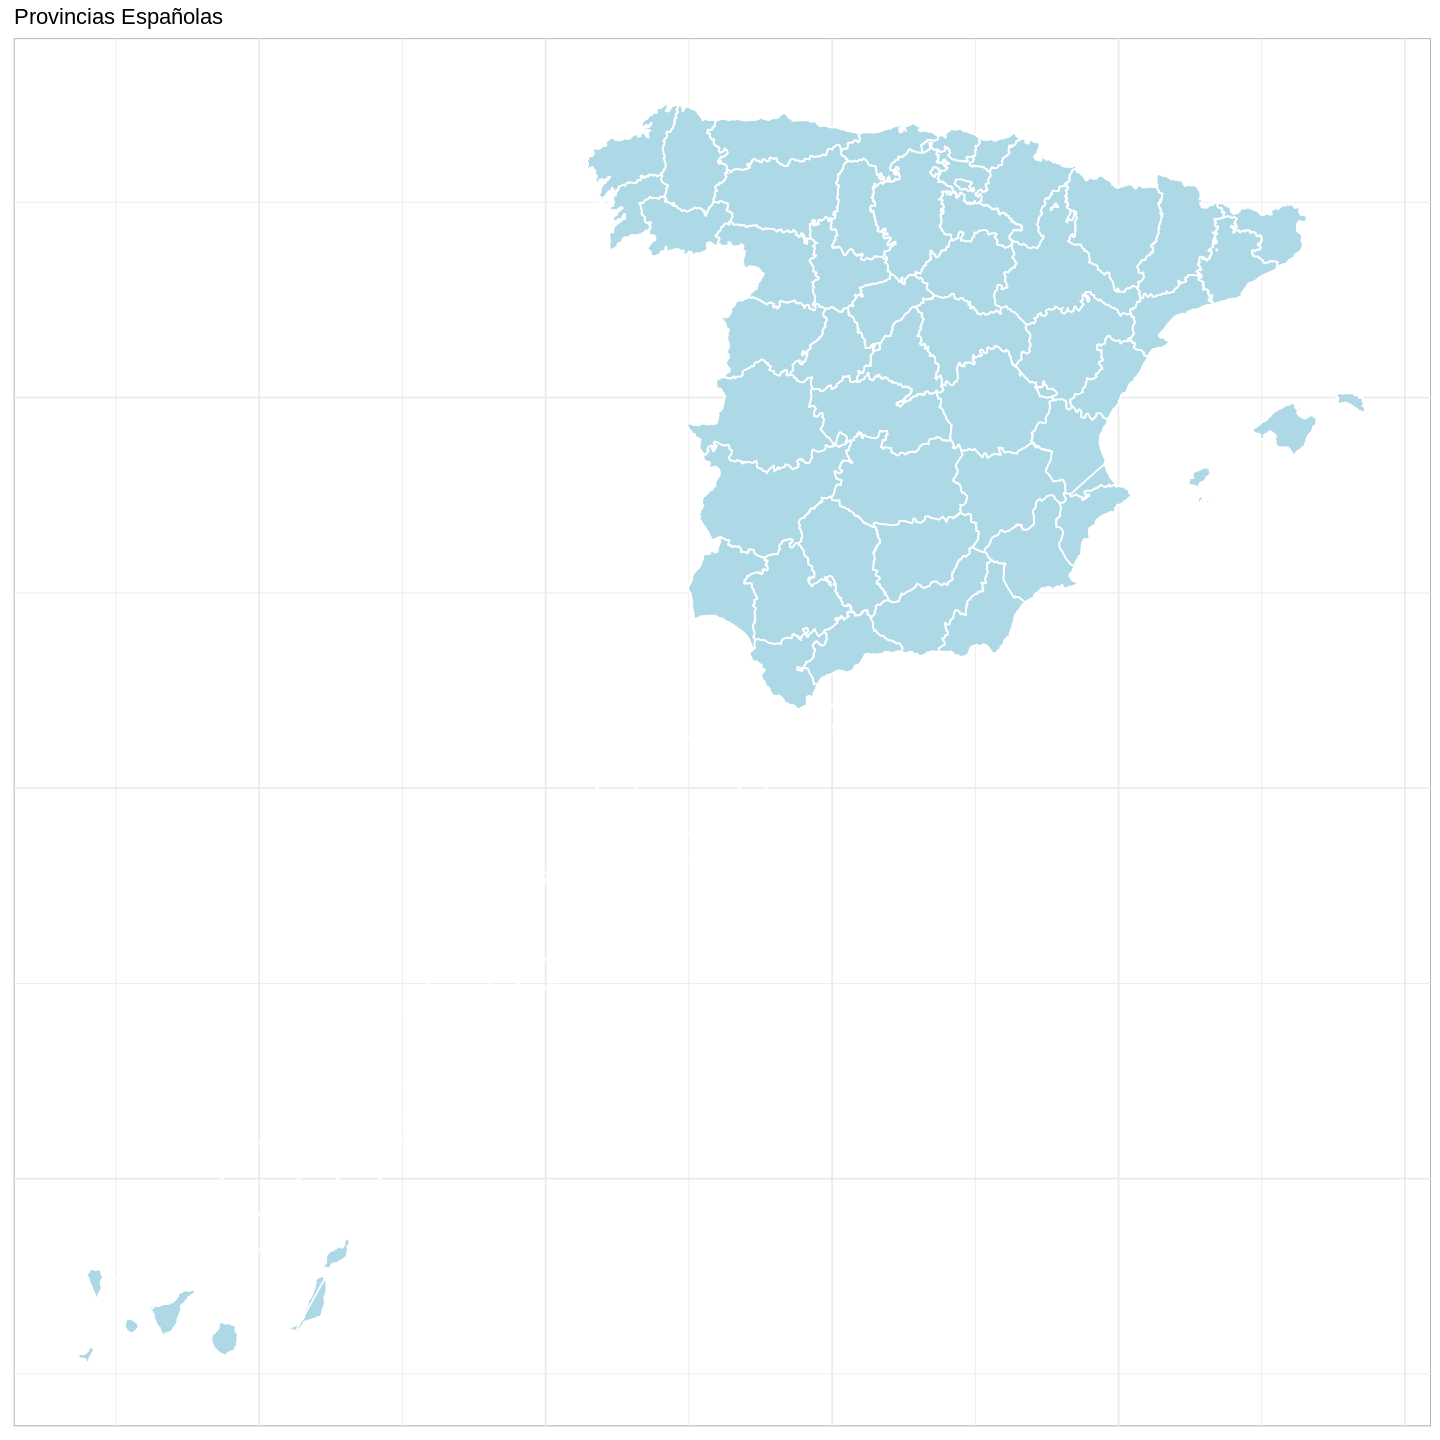

In [ ]:
options(repr.plot.width=12, repr.plot.height=12) #Establecemos el tamaño del gráfico para que no nos aparezca muy pequeño


mapa_rgdal %>%
  ggplot() +
  geom_polygon(aes( x = long, y = lat, group = group),
               fill = "lightblue",
               color = "white") +
  theme_minimal() +
  theme(
    axis.line = element_blank(),
    axis.text = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    panel.background = element_rect(colour= "darkgrey", size= 0.5)) +
  ggtitle("Provincias Españolas")

Al emplear la función `options()` para modificar el tamaño del mapa, a partir de ahora, en lo que sigue del cuaderno, todos los mapas aparecerán con el mismo tamaño, por lo que, si deseáramos volver a modificar el tamaño de los gráficos, deberíamos volver a usar `options()` cambiando sus parámetros.

### Mejoramos el mapa y mostramos información estadística: mapa estático de cloropletas

Como ejemplo, vamos a mostrar la tasa de paro provincias.

Para ello, primero debemos cargar el archivo con esa información. La tasa de paro por provincias la hemos obtenido de la siguiente [pestaña del INE](https://www.ine.es/jaxiT3/Datos.htm?t=3996) (la información se refiere al primer trimestre de 2021) [Es posible que al entrar en el enlace no salga directamente la tabla con dicha tasa de paro, pero podemos buscarla fácilmente clicando en *Resultados provinciales* > *Población en viviendas familiares (incluye parados)* > *Población de 16 y más años por relación con la actividad económica, sexo y provincia*. Llegamos así a una página que nos permitirá construir nuestra tabla para descargar.]

Nos descargamos la información en un *.csv* separado por punto y coma. Lo cargamos en Colab, por ejemplo, de manera manual (como hemos hecho con los archivos que contienen la información geográfica), y leemos el archivo (antes de subirlo le hemos cambiado el nombre a *Tasa_Paro_Provincias* para facilitar seguir el cuaderno):

In [ ]:
datos_Tasa_Paro <- read.csv("Tasa_Paro_Provincias.csv", sep=";", dec=",", fileEncoding="latin1")
head(datos_Tasa_Paro)

,Sexo,Provincias,Tasas,Periodo,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Ambos sexos,02 Albacete,Tasa de paro de la población,2021T1,19.77
2,Ambos sexos,03 Alicante/Alacant,Tasa de paro de la población,2021T1,19.17
3,Ambos sexos,04 Almería,Tasa de paro de la población,2021T1,17.14
4,Ambos sexos,01 Araba/Álava,Tasa de paro de la población,2021T1,11.31
5,Ambos sexos,33 Asturias,Tasa de paro de la población,2021T1,14.09
6,Ambos sexos,05 Ávila,Tasa de paro de la población,2021T1,15.81


Cambiamos el nombre de la columna `Total` a `Tasa_Paro`, y  dividimos la columna `Provincias` en dos, para tener los códigos de provincia en una columna y poder hacer la unión con el dataframe con la información geográfica.

Solo nos quedaremos con las columnas `Codigo` y `Tasa_Paro`:

In [ ]:
datos_Tasa_Paro <- rename(datos_Tasa_Paro, Tasa_Paro = Total)
datos_Tasa_Paro <- separate(data=datos_Tasa_Paro, col=Provincias, into=c("Codigo", "Provincia"), sep=" ")
datos_Tasa_Paro <- datos_Tasa_Paro[, c("Codigo", "Tasa_Paro")]
head(datos_Tasa_Paro)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 6 rows [8, 16, 18, 36, 38, 40].”


,Codigo,Tasa_Paro
,<chr>,<dbl>
1,02,19.77
2,03,19.17
3,04,17.14
4,01,11.31
5,33,14.09
6,05,15.81


Hacemos la unión de tablas con el dataframe de la capa geográfica. Las tablas se fusionarán en base a la variable `Codigo`:

In [ ]:
mapa_Tasa_Paro_rgdal <- left_join(mapa_rgdal, datos_Tasa_Paro, by="Codigo")
mapa_Tasa_Paro_rgdal <- mapa_Tasa_Paro_rgdal[,c("Provincia", "Codigo", "Tasa_Paro", "long", "lat", "group")] #Nos quedamos con las columnas más relevantes
head(mapa_Tasa_Paro_rgdal)

Provincia,Codigo,Tasa_Paro,long,lat,group
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
València/Valencia,46,14.75,-0.4474555,38.81969,0.1
València/Valencia,46,14.75,-0.4535420,38.81728,0.1
València/Valencia,46,14.75,-0.4606183,38.81486,0.1
València/Valencia,46,14.75,-0.4613619,38.81046,0.1
València/Valencia,46,14.75,-0.4618765,38.80765,0.1
València/Valencia,46,14.75,-0.4685905,38.80567,0.1


Volvemos a dibujar el mapa, pero ahora indicando, mediante una escala de colores (mapa de cloropletas), la tasa de paro de cada provincia.

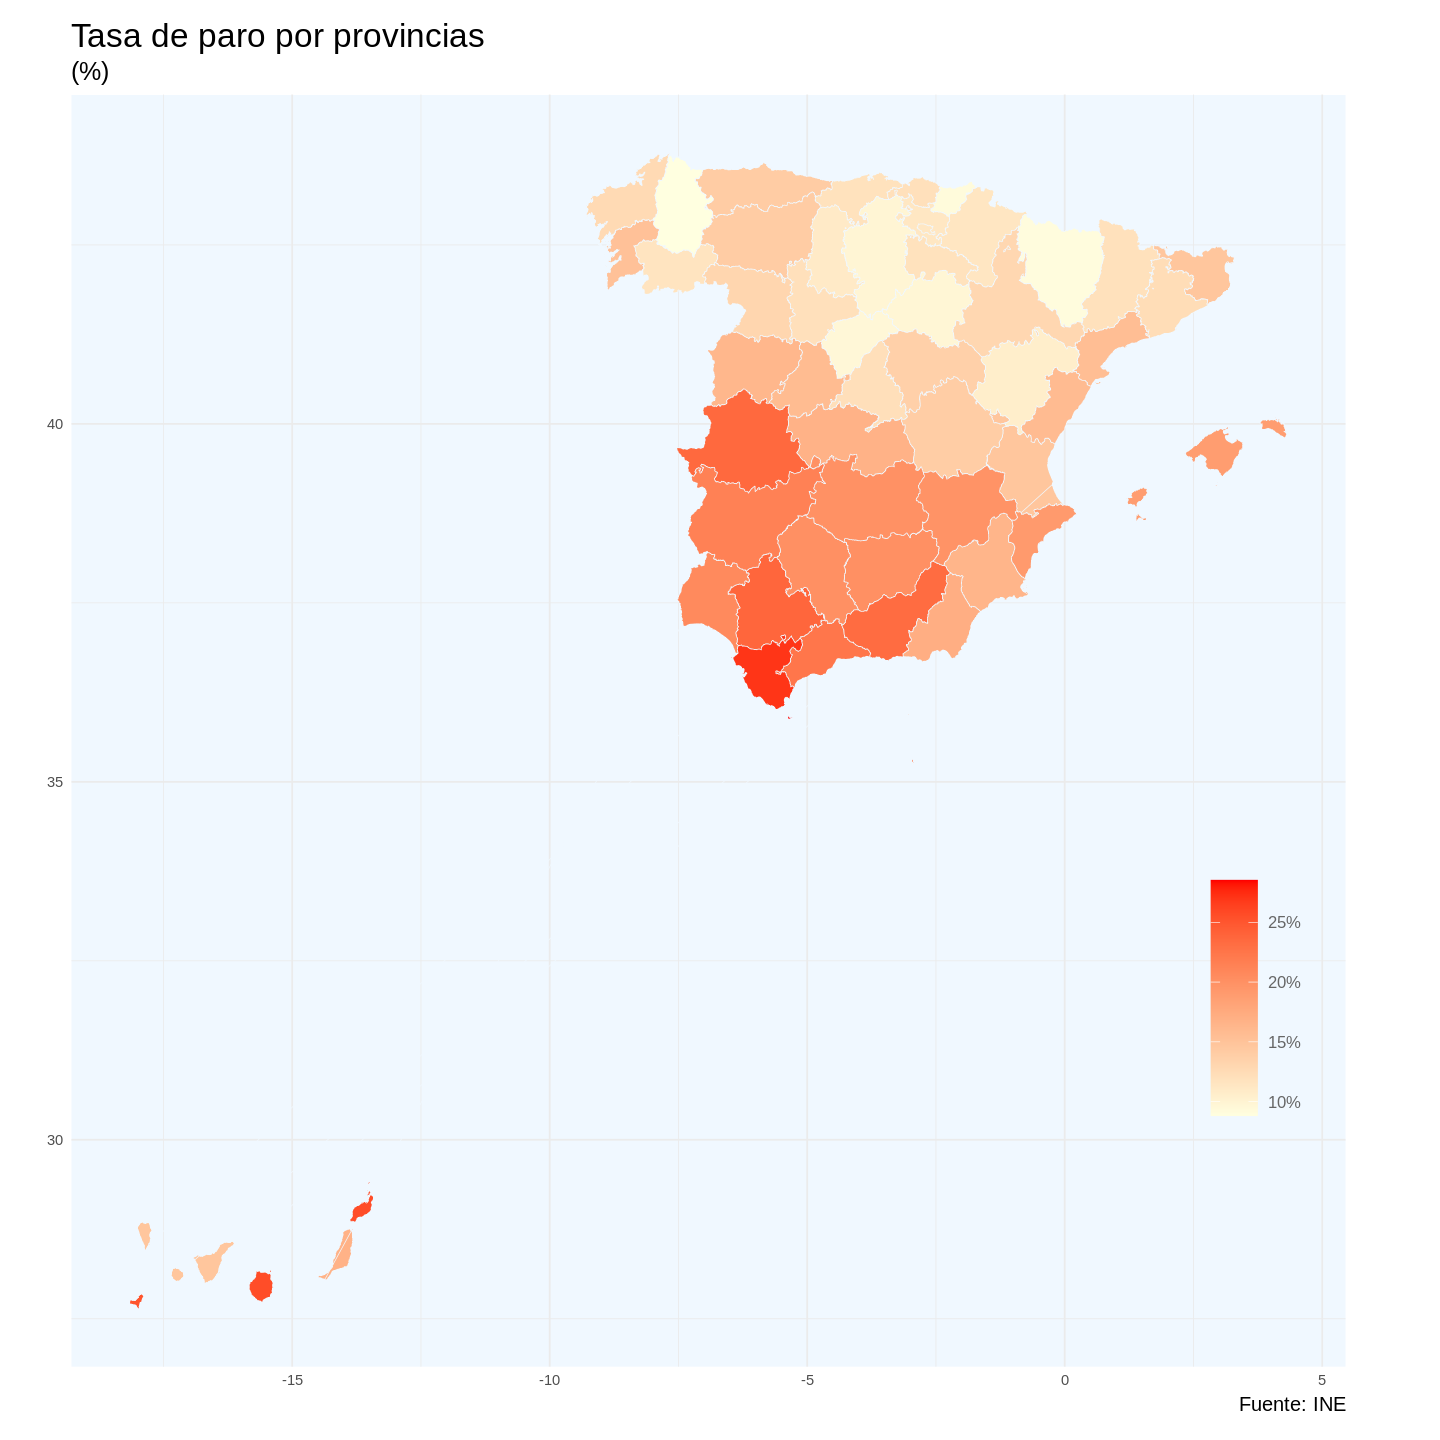

In [ ]:
ggplot(aes(x = long, y = lat, group = group),  #Asignamos la coordenadas
       data = mapa_Tasa_Paro_rgdal) + 

  geom_polygon(aes(fill = Tasa_Paro/100), #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
                   color= "aliceblue", size = 0.2) + #color: color de las lineas de separación entre provincias

  labs( title = "Tasa de paro por provincias", #Títulos y subtítulos
        subtitle = "(%)",
        caption = "Fuente: INE",
        fill = "") + #Título de la leyenda

  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
  theme(
    axis.line = element_blank(),     #Línea de recuadro del mapa
    #axis.text = element_blank(),     Si queremos que no aparezca información sobre las coordenadas de latitud y longitud, debemos quitar la #
    axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
    #axis.ticks = element_blank(),
    #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
    panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
    plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
    plot.subtitle = element_text(size = 15, hjust = 0),
    plot.caption = element_text(size = 12, hjust = 1),
    legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
    #legend.title = element_text(color = "grey40", size = 15),
    legend.text = element_text(color = "grey40", size = 10, hjust = 0), #Tamaño texto de la leyenda
    legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
    plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

  scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

Y con la siguiente línea de código, guardamos la imagen en el cuaderno de Colab:

In [ ]:
ggsave("Tasa de paro por provincias.png", plot = last_plot())

Saving 6.67 x 6.67 in image



Para descargárnosla en nuestro repositorio local debemos encontrar el archivo junto a los archivos cargados en el cuaderno de Colab, darle a los tres puntitos que nos salen al poneros sobre él y clicar en descargar:
\begin{align}
\end{align}
![picture](https://raw.githubusercontent.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/master/Images/Descargar%20archivo%20desde%20Colab%20usando%20R.png)

##Utilizamos la librería `sf`

Veámos ahora como emplear la librería `sf` para la confección de mapas en R. Para ello, simplemente, replicaremos todo el proceso anterior, pero haciendo uso de esta otra librería.

###Manipulación primaria de los archivos que contienen la información geográfica

Comenzamos también con el archivo que contiene las coordenadas de las islas Canarias. En este caso, la función de lectura de la librería `sf` es `read_sf()`:

In [ ]:
Canarias_sf <- read_sf("recintos_provinciales_inspire_canarias_wgs84.shp")

Como podemos comprobar a continuación, el objeto obtenido al usar `read_sf()` es ya un dataframe, por lo que no será necesario realizar la manipulación y conversión en dataframe que hemos realizado anteriormente para `rgdal`.

In [ ]:
class(Canarias_sf)

[1] "sf"         "tbl_df"     "tbl"        "data.frame"

In [ ]:
head(Canarias_sf)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<MULTIPOLYGON [°]>
ES.IGN.BDDAE.34053800000,ES,https://inspire.ec.europa.eu/codelist/AdministrativeHierarchyLevel/3rdOrder,Provincia,34053800000,Santa Cruz de Tenerife,ES7,ES70,NA,MULTIPOLYGON (((-17.9645 27...
ES.IGN.BDDAE.34053500000,ES,https://inspire.ec.europa.eu/codelist/AdministrativeHierarchyLevel/3rdOrder,Provincia,34053500000,Las Palmas,ES7,ES70,NA,MULTIPOLYGON (((-15.69643 2...


Si pedimos a R que nos muestre el dataframe, Colab arroja un error provocado por no haber cargado la librería `geojsonio`. En la fecha de creación de este cuaderno (mayo de 2022), no es posible cargar esta librería. Sin embargo, no pasa nada, podemos seguir con nuestra idea de dibujar el mapa sin problemas, ya que, aunque Colab arroje el error, sí se nos muestra la información que pedimos después del error.

Como podemos observar, nuestro dataframe contiene las mismas columnas que contenía el objeto `SpatialPolygonsDataFrame` obtenido al usar la función de lectura `read_OGR()`, más una última columna adicional llamada `geometry`. Dicha columna contiene las coordenadas geográficas necesarias para dibujar el mapa de las islas. Obviamente, el objeto `SpatialPolygonsDataFrame` también contenía dicha información, solo que lo hacía interiormente, y, al convertirlo en un dataframe normal, se nos mostraba a través de las columnas de latitud y longitud.

Cargado el archivo concerniente a Canarias, hacemos lo mismo con el que contiene la información geográfica del resto del territorio nacional español:

In [ ]:
Resto_Espanna_sf <- read_sf("recintos_provinciales_inspire_peninbal_etrs89.shp")

In [ ]:
class(Resto_Espanna_sf)

[1] "sf"         "tbl_df"     "tbl"        "data.frame"

In [ ]:
names(Resto_Espanna_sf)

[1] "INSPIREID"  "COUNTRY"    "NATLEV"     "NATLEVNAME" "NATCODE"   
 [6] "NAMEUNIT"   "CODNUT1"    "CODNUT2"    "CODNUT3"    "geometry"

Antes de utilizar la función `rbind()` para concatenar ambos dataframes en uno solo con toda la información geográfica para dibujar el mapa de España, es necesario ejecutar la siguiente línea de código:

In [ ]:
Resto_Espanna_sf <- st_transform(Resto_Espanna_sf, crs=st_crs(4326))

Si no realizáramos esto, al usar `rbind()` obtendríamos el siguiente error:
```
Error: arguments have different crs
Traceback:

1. rbind(Resto_Espanna_sf, Canarias_sf)
2. rbind(deparse.level, ...)
3. stop("arguments have different crs", call. = FALSE)
```
Esto se debe a que las coordenadas de Canarias y las del resto de España se encuentran en sistemas de coordenadas diferentes (*crs = coordinate reference system*). Las de Canarias están expresadas en el sistema WGS84 y las del resto de España, en el sistema ETRS89.

Al emplear la librería `rgdal`, R solucionaba este problema automáticamente, pero al emplear `sf` debemos cambiar el sistema de uno de los dos archivos para poder realizar la concatenación. Por ello, con la opción `crs=st_crs(4326)` cambiamos el sistema de coordenadas ETRS89 a WGS84 (`4326` es un identificador numérico del sistema WGS84).

In [ ]:
mapa_sf <- rbind(Resto_Espanna_sf, Canarias_sf)

In [ ]:
names(mapa_sf)

[1] "INSPIREID"  "COUNTRY"    "NATLEV"     "NATLEVNAME" "NATCODE"   
 [6] "NAMEUNIT"   "CODNUT1"    "CODNUT2"    "CODNUT3"    "geometry"

###Dibujamos el mapa

Hecha la concatenación anterior, ya podemos dibujar el mapa de España:

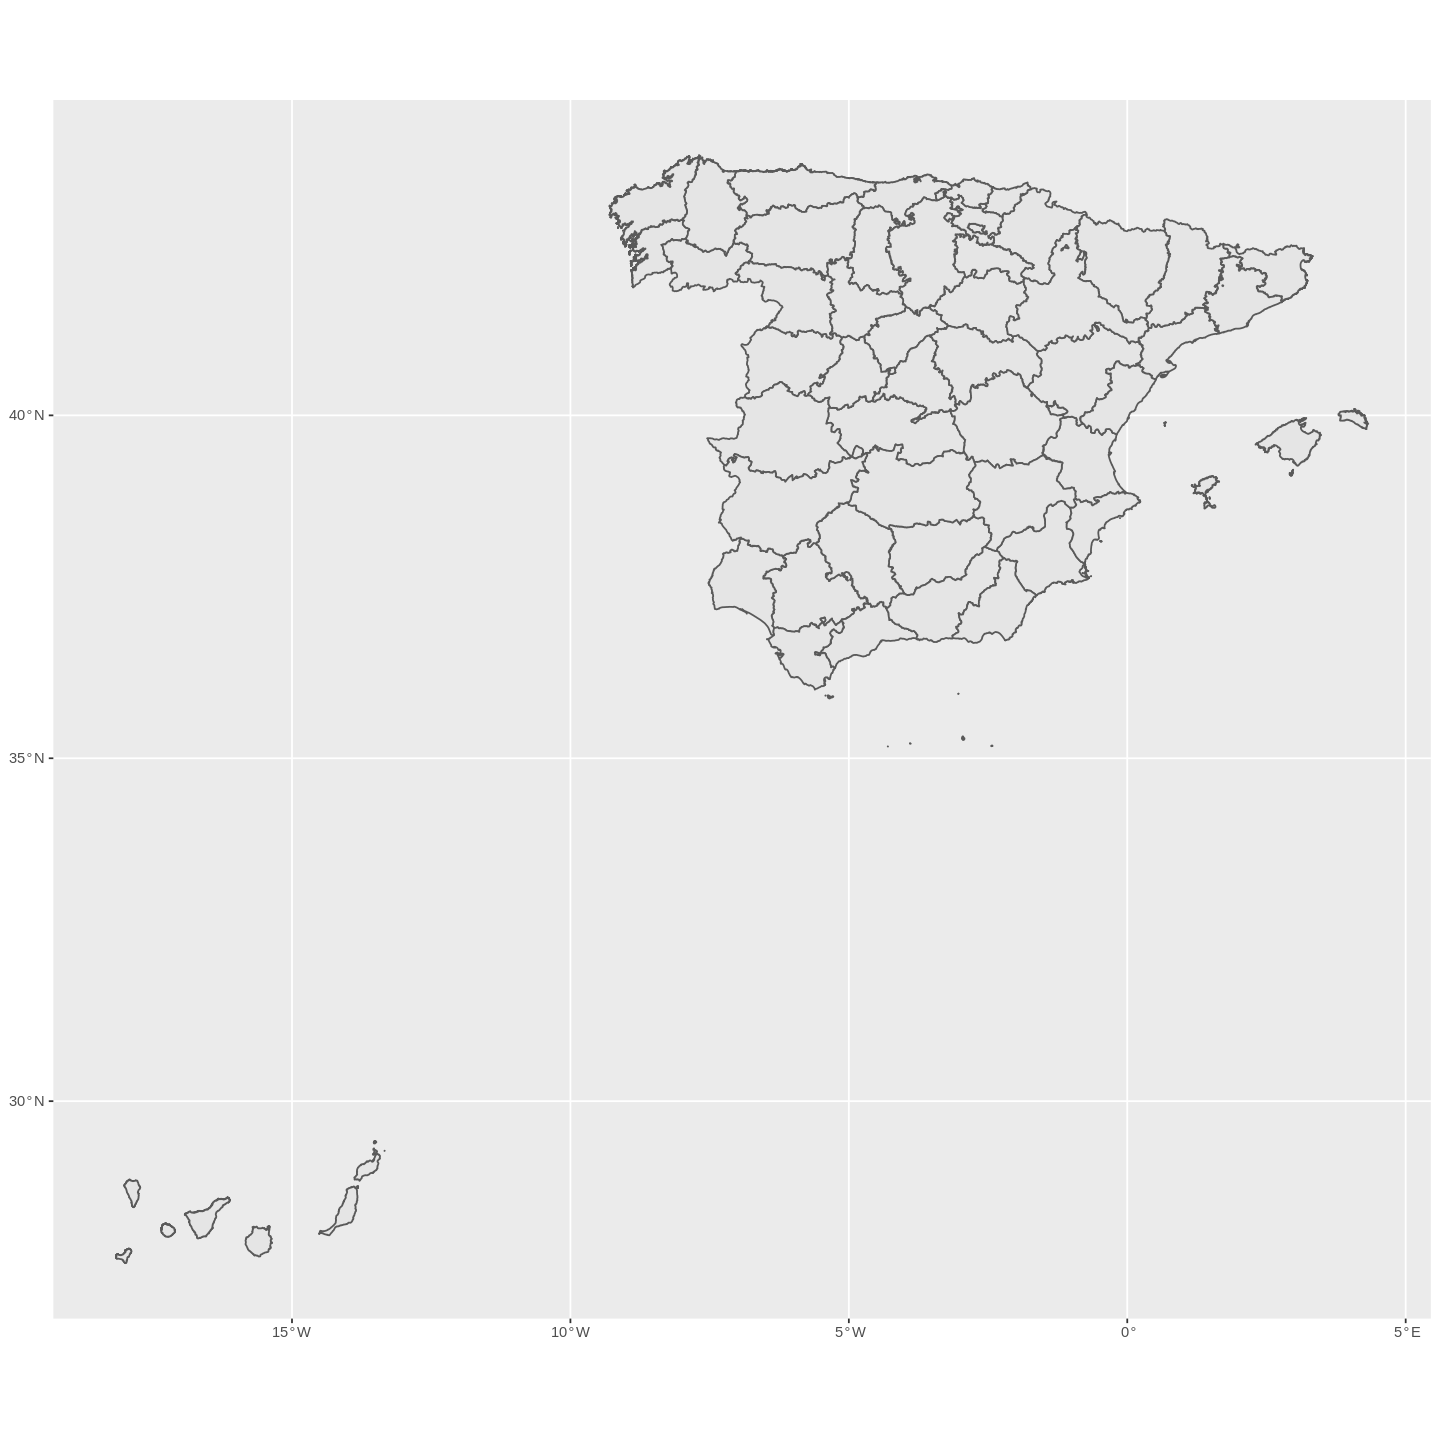

In [ ]:
mapa_sf %>%
  ggplot() + #Abrimos ggplot2
  geom_sf()  #Y le añadimos una geometría sf


### Mejoramos el mapa y mostramos información estadística: mapa estático de cloropletas

Vamos a crear el mismo mapa de cloropletas que hemos creado con `rgdal`. Entonces, para poder realizar la unión con el dataframe `Tasa_Paro` que contiene la información de las tasas de paro provinciales, debemos añadir una columna de códigos provinciales a nuestro dataframe `mapa_sf`, como hicimos con el dataframe `mapa_rgdal`. El método es el mismo:

In [ ]:
mapa_sf$Codigo <- substr(mapa_sf$NATCODE, start=5, stop=6)

Unimos los dataframes:

In [ ]:
mapa_Tasa_Paro_sf <- left_join(mapa_sf, datos_Tasa_Paro, by="Codigo")

In [ ]:
names(mapa_Tasa_Paro_sf)

[1] "INSPIREID"  "COUNTRY"    "NATLEV"     "NATLEVNAME" "NATCODE"   
 [6] "NAMEUNIT"   "CODNUT1"    "CODNUT2"    "CODNUT3"    "geometry"  
[11] "Codigo"     "Tasa_Paro"

Tenemos así un dataframe que contiene las coordenadas de cada provincia y las tasas de paro provinciales, por lo que podemos crear el mapa de cloropletas a imagen del anterior creado con `rgdal`:

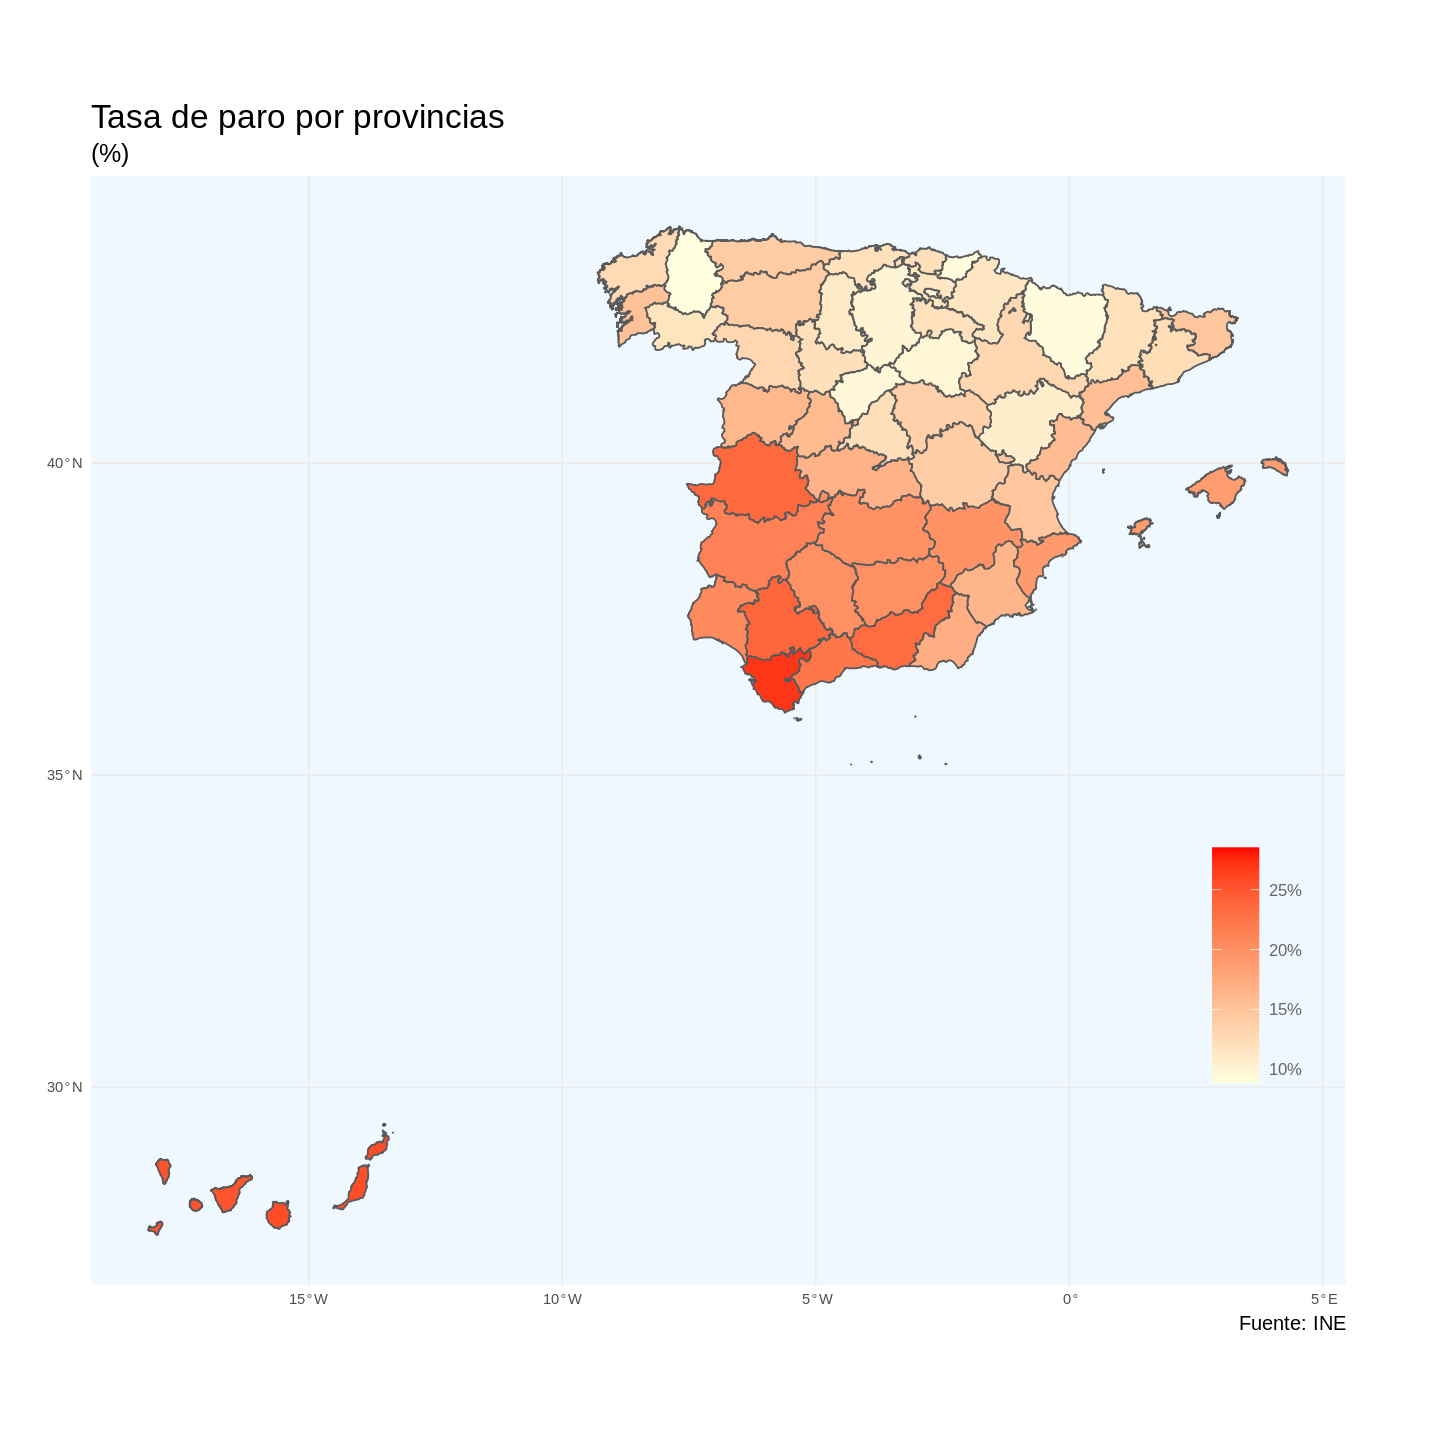

In [ ]:
mapa_Tasa_Paro_sf %>%

  ggplot(aes(fill = Tasa_Paro/100), #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
                   color= "aliceblue", size = 0.2) + #color: color de las lineas de separación entre provincias

  geom_sf() + #Añadimos la geometría sf

  labs( title = "Tasa de paro por provincias", #Títulos y subtítulos
        subtitle = "(%)",
        caption = "Fuente: INE",
        fill = "") + #Título de la leyenda

  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
  theme(
    axis.line = element_blank(),     #Línea de recuadro del mapa
    #axis.text = element_blank(),     Si queremos que no aparezca información sobre las coordenadas de latitud y longitud, debemos quitar la #
    axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
    #axis.ticks = element_blank(),
    #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
    panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
    plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
    plot.subtitle = element_text(size = 15, hjust = 0),
    plot.caption = element_text(size = 12, hjust = 1),
    legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
    #legend.title = element_text(color = "grey40", size = 15),
    legend.text = element_text(color = "grey40", size = 10, hjust = 0), #Tamaño texto de la leyenda
    legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
    plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

  scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

El resultado es casi idéntico al obtenido con la librería `rgdal`.

In [ ]:
ggsave("Tasa de paro por provincias 2.png", plot = last_plot())

Saving 6.67 x 6.67 in image



Guardamos la imagen en Colab, que podremos descargar realizando el paso explicado más arriba.

##Truco: ¿Cómo acercar las Canarias a la península?


Debido a la gran distancia entre las islas Canarias y el resto de España, es habitual ver mapas donde las Canarias han sido "subidas". Por lo que, si es quieres crear un mapa de este estilo, a continuación, te mostramos cómo hacerlo.

Vamos a emplear la librería `sf`, aunque también podríamos usar `rgdal`.

Cargaremos de nuevo la información geográfica para que la explicación sea lo más sencilla posible:

In [ ]:
Canarias_sf <- read_sf("recintos_provinciales_inspire_canarias_wgs84.shp")
Resto_Espanna_sf <- read_sf("recintos_provinciales_inspire_peninbal_etrs89.shp")

Como vimos arriba, la librería `sf` requería de la modificación del sistema de coordenadas de alguno de los dos archivos para poder hacer la concatenación posteriormente. Por ello, cambiamos el sistema el dataframe `Resto_Espanna_sf` al sistema WGS84.

Sin embargo, en esta ocasión vamos a hacerlo de otra forma para mostrar esta otra alternativa: vamos a establecer como sistema de coordenadas, el que tiene nuestro dataframe `Resto_Espanna_sf`:

In [ ]:
crs <- st_crs(Resto_Espanna_sf)

Y luego cambiaremos el sistema de coordenadas de `Canarias_sf` en base a dicho objeto `crs` que hemos creado.

Hecho esto, pasamos al proceso para mover las Canarias.

Para ello, lo primero que vamos a hacer va a ser crear un nuevo objeto que contenga la información geográfica del dataframe de las Canarias.

In [ ]:
Mover_Canarias <- Canarias_sf %>%
  st_transform(crs) %>% #Modificamos el sistema de coordenadas de Canarias
  st_geometry()

Una vez extraída dicha información geográfica, la modificamos añadiéndole un vector cuyo primer término corresponderá a la lomgitud, y cuyo segundo término, a la latitud:

In [ ]:
Mover_Canarias <-  Mover_Canarias + c(4.5, 7)

Es decir, hemos sumado 4,5º de longitud y 7º de latitud.

Tras esto, especificamos que las Canarias tengan la geometría del objeto `Mover_Canarias`:

In [ ]:
Canarias_sf <-  Canarias_sf  %>%
  st_set_geometry(Mover_Canarias)  %>% 
  st_set_crs(crs) #Volvemos a especificar el sistema de coordenadas nuevo

Por último, realizamos la concatenación de dataframes, y añadimos la información sobre las tasas de paro provinciales:

In [ ]:
mapa_truco <- rbind(Resto_Espanna_sf, Canarias_sf)
mapa_truco$Codigo <- substr(mapa_truco$NATCODE, start=5, stop=6)
mapa_Tasa_Paro_truco <- left_join(mapa_truco, datos_Tasa_Paro, by="Codigo")

Dibujamos el mapa de cloropletas con las islas Canarias cerca de la península:

Saving 6.67 x 6.67 in image



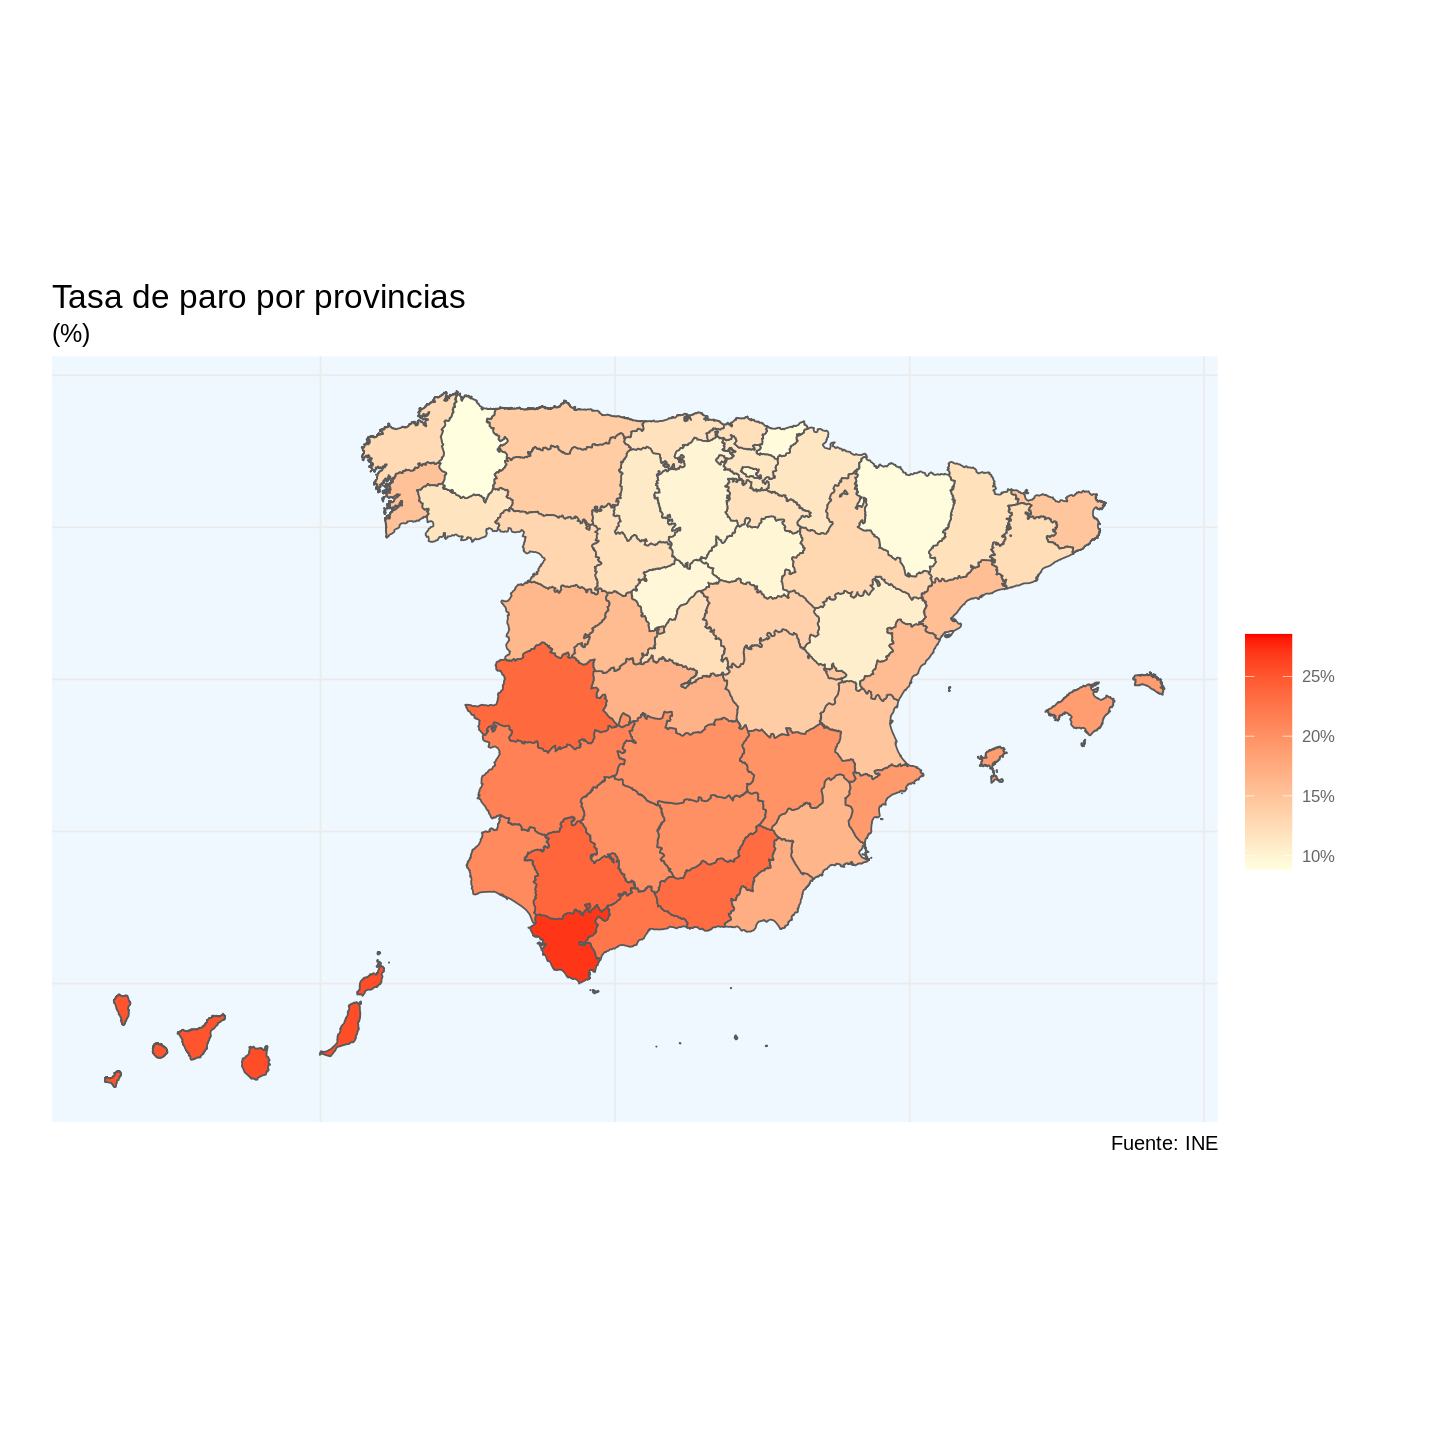

In [ ]:
mapa_Tasa_Paro_truco %>%

  ggplot(aes(fill = Tasa_Paro/100), #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
                   color= "aliceblue", size = 0.2) + #color: color de las lineas de separación entre provincias

  geom_sf() + #Añadimos la geometría sf

  labs( title = "Tasa de paro por provincias", #Títulos y subtítulos
        subtitle = "(%)",
        caption = "Fuente: INE",
        fill = "") + #Título de la leyenda

  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
  theme(
    axis.line = element_blank(),     #Línea de recuadro del mapa
    axis.text = element_blank(),     #Hemos quitado la información de latitud y longitud porque no tenía mucho sentido, al haber movido las Canarias
    axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
    #axis.ticks = element_blank(),
    #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
    panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
    plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
    plot.subtitle = element_text(size = 15, hjust = 0),
    plot.caption = element_text(size = 12, hjust = 1),
    legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
    #legend.title = element_text(color = "grey40", size = 15),
    legend.text = element_text(color = "grey40", size = 10, hjust = 0), #Tamaño texto de la leyenda
    #legend.position = c(0.93, 0.3), #Deshabilitamos modificar la posición de la leyenda, para que se coloque en su lugar por defecto
    plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

  scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

  ggsave("Tasa de paro por provincias con las Canarias acercadas.png", plot = last_plot()) #Guardamos la imagen en el cuaderno de Colab por si queremos descargarla

##`mapSpain`: otra forma de acerca las Canarias a la península, y mucho más

`mapSpain` es una librería específicamente programada para crear mapas de los diferentes niveles administrativos de España (todo el país, NUTS - unidad  empleada por el Eurostat -, CCAA, provincias y municipios). Para ello, entre otras fuentes, bebe directamente del IGN y del Eurostat.

En nuestro caso, vamos a emplearla para realizar un mapa de cloropletas con las islas Canarias cerca de la península. Sin embargo, su funcionalidad es muy diversa, como podemos ver en el siguiente [enlace](https://ropenspain.github.io/mapSpain/articles/x02_mapasesp.html).

In [ ]:
install.packages("mapSpain")
library(mapSpain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘geometries’, ‘jsonify’, ‘rapidjsonr’, ‘sfheaders’, ‘geojsonsf’, ‘countrycode’, ‘giscoR’




(IMPORTANTE: actualmente, para poder cargar estar librería en Colab, resulta esencial haber cargado antes la librería `sf`, como hemos hecho en el inicio del cuaderno).

Para realizar nuestro cometido, debemos emplear dos funciones clave: `esp_get_prov()`(para crear un mapa de las provincias españolas) y `esp_get_can_box()` (para crear la línea/caja que suele aparecer en los mapas con las Canarias desplazadas).

Asimismo, por defecto, `mapSpain` acerca las Canarias a la península. Entonces, si, por lo que sea, no quisiéramos acercarlas, debemos usar la opción `moveCAN = F` dentro de la función que crea el mapa (`esp_get_prov()` en nuestro caso).

Creamos el mapa de las provincias para ilustrar el funcionamiento de dichas funciones clave:

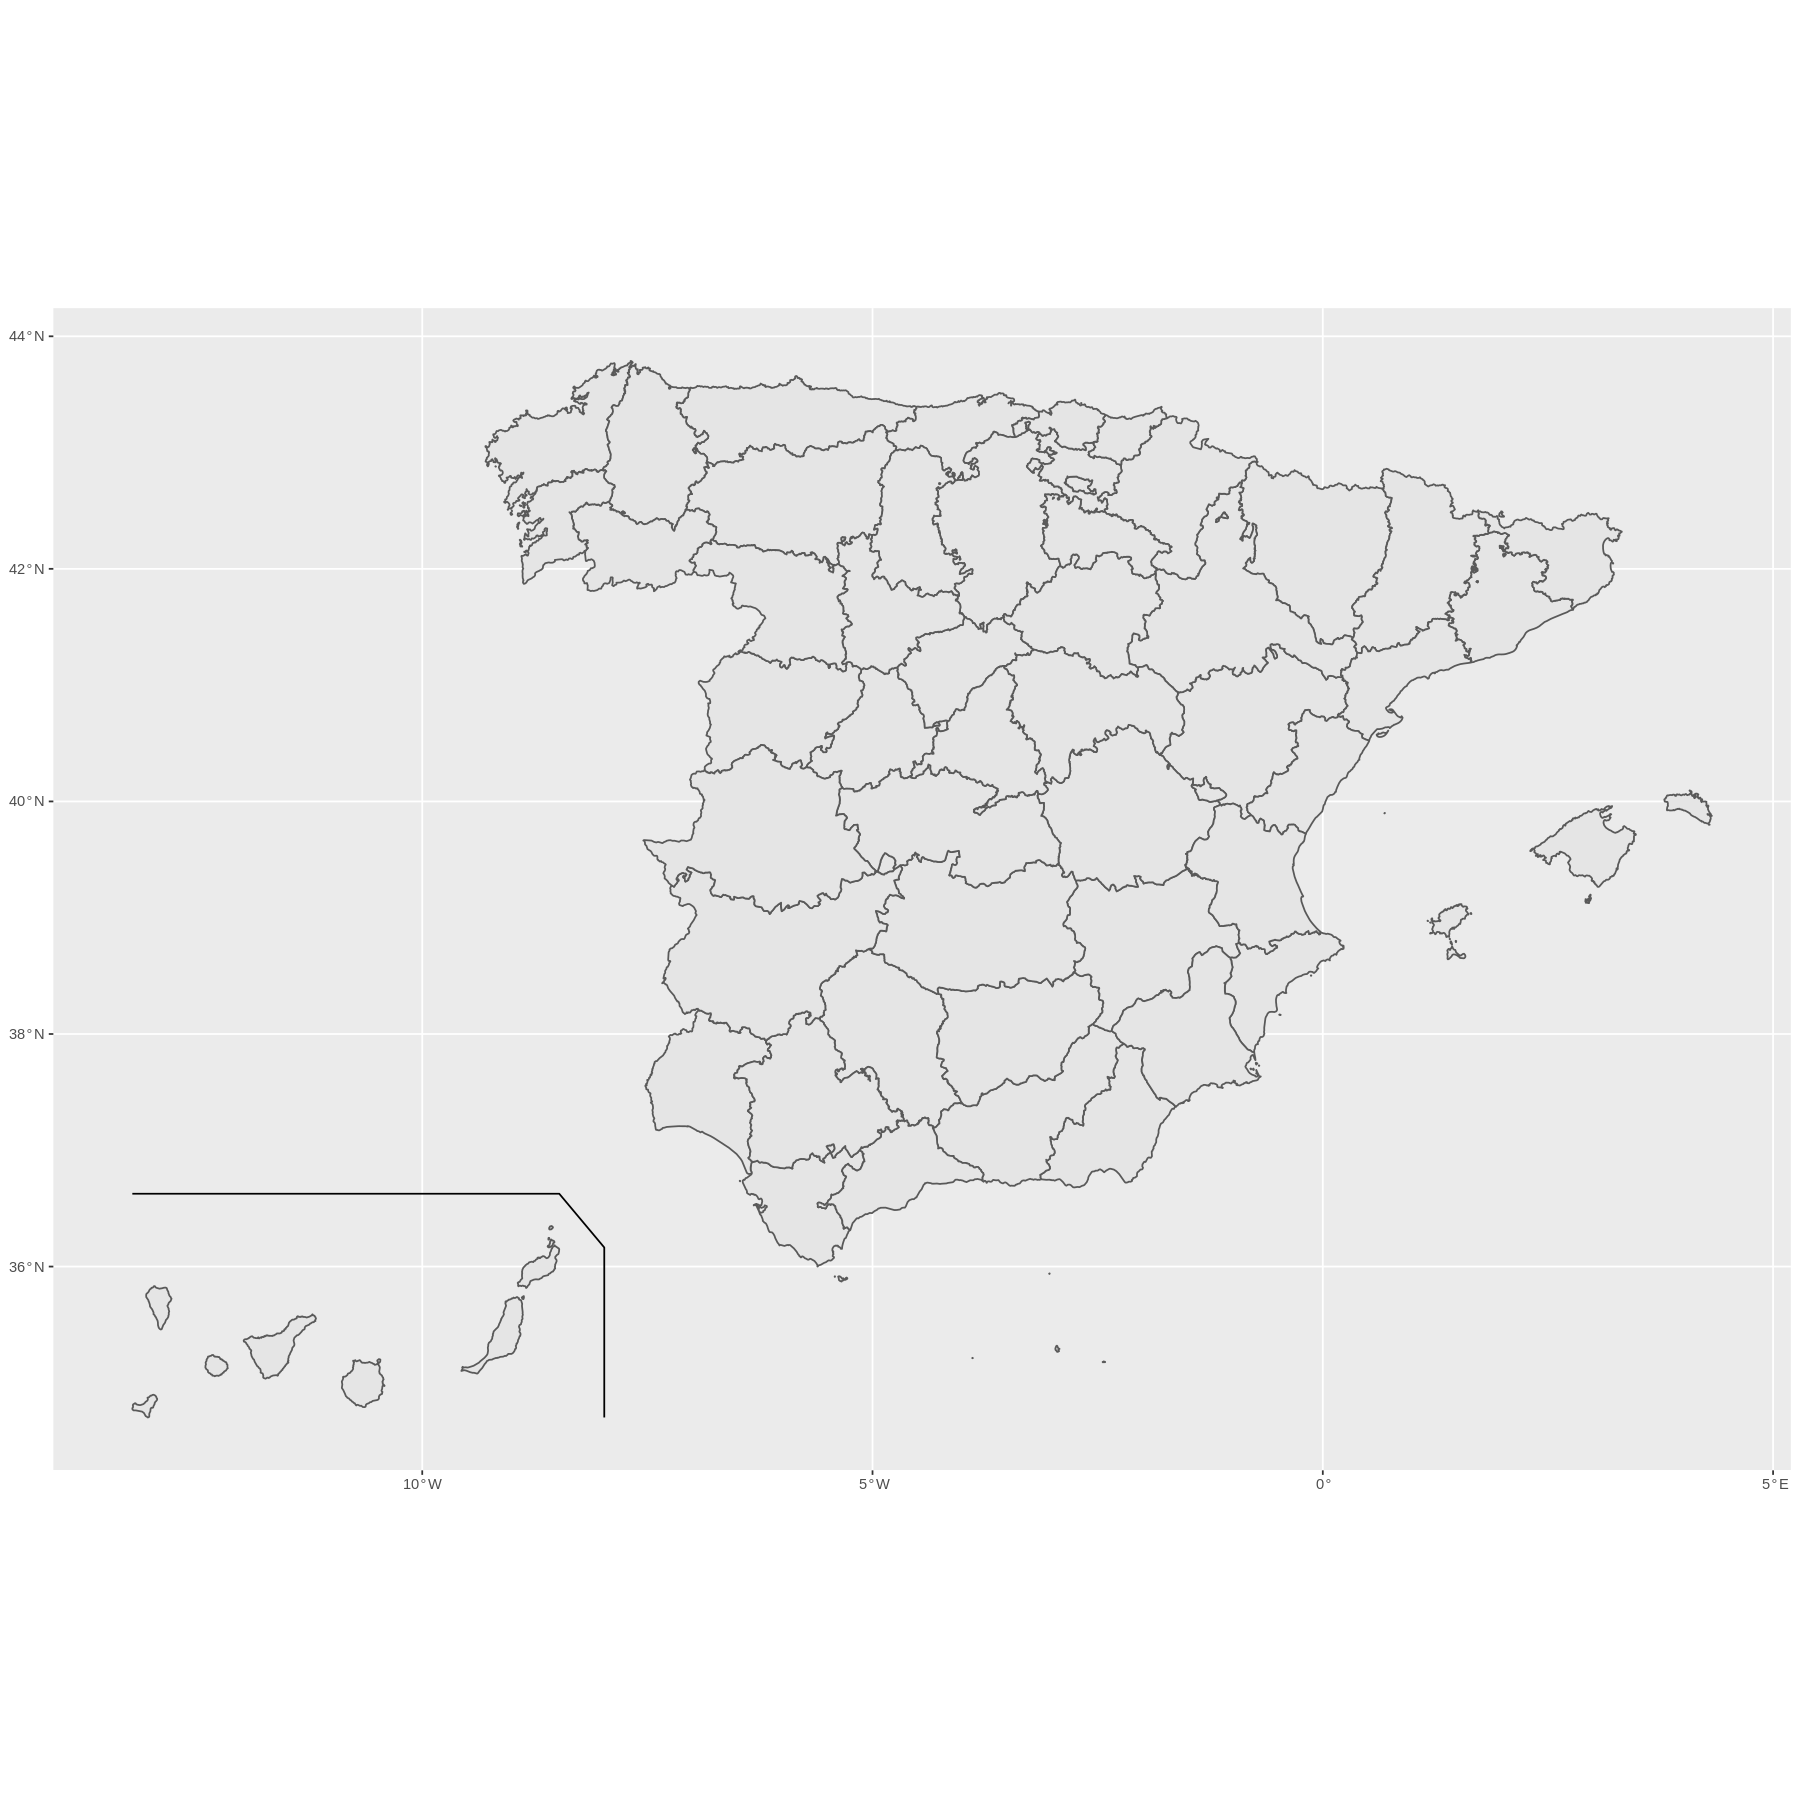

In [ ]:
mapa_provincias <- esp_get_prov()
can_box <- esp_get_can_box()

ggplot() +
  geom_sf(data = mapa_provincias) +
  geom_sf(data = can_box) 

La cuestión ahora es: ¿cómo unir el mapa creado con esta librería con el dataframe con las tasas de paro provinciales? La respuesta, como hasta ahora, consiste en realizar la unión en base a una variable común.

Véamos qué variables contiene el objeto `mapa_provincias`:

In [ ]:
head(mapa_provincias)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

codauto cpro iso2.prov.code nuts.prov.code ine.prov.name iso2.prov.name.es
4  01      04   ES-AL          ES611          Almería       Almería          
11 01      11   ES-CA          ES612          Cádiz         Cádiz            
14 01      14   ES-CO          ES613          Córdoba       Córdoba          
18 01      18   ES-GR          ES614          Granada       Granada          
21 01      21   ES-H           ES615          Huelva        Huelva           
23 01      23   ES-J           ES616          Jaén          Jaén             
   iso2.prov.name.ca iso2.prov.name.ga iso2.prov.name.eu cldr.prov.name.en
4  NA                NA                NA                Almería          
11 NA                NA                NA                Cádiz            
14 NA                NA                NA                Córdoba          
18 NA                NA                NA                Granada          
21 NA                NA                NA                Huelva           
23 NA                NA                NA                Jaén             
   geometry                       ⋯ prov.shortname.en prov.shortname.es
4  MULTIPOLYGON (((-1.630033 3... ⋯ Almería           Almería          
11 MULTIPOLYGON (((-5.142423 3... ⋯ Cádiz             Cádiz            
14 MULTIPOLYGON (((-4.268895 3... ⋯ Córdoba           Córdoba          
18 POLYGON ((-2.341602 38.0260... ⋯ Granada           Granada          
21 POLYGON ((-6.180307 37.9410... ⋯ Huelva            Huelva           
23 POLYGON ((-2.551274 38.0841... ⋯ Jaén              Jaén             
   prov.shortname.ca prov.shortname.ga prov.shortname.eu nuts2.code nuts2.name
4  Almeria           Almería           Almería           ES61       Andalucía 
11 Cadis             Cádiz             Cádiz             ES61       Andalucía 
14 Còrdova           Córdoba           Kordoba           ES61       Andalucía 
18 Granada           Granada           Granada           ES61       Andalucía 
21 Huelva            Huelva            Huelva            ES61       Andalucía 
23 Jaén              Xaén              Jaén              ES61       Andalucía 
   nuts1.code nuts1.name geometry                      
4  ES6        SUR        MULTIPOLYGON (((-1.630033 3...
11 ES6        SUR        MULTIPOLYGON (((-5.142423 3...
14 ES6        SUR        MULTIPOLYGON (((-4.268895 3...
18 ES6        SUR        POLYGON ((-2.341602 38.0260...
21 ES6        SUR        POLYGON ((-6.180307 37.9410...
23 ES6        SUR        POLYGON ((-2.551274 38.0841...

De todas las columnas que vemos, hay una que parece contener los mismos valores que la variable `Codigo` del dataframe `datos_Tasa_Paro`: la variable `cpro`.

Entonces, para realizar la unión fácilmente, cambiaremos el nombre de `cpro` a `Codigo`:

In [ ]:
mapa_provincias <- rename(mapa_provincias, Codigo = cpro)

In [ ]:
mapa_provincias <- left_join(mapa_provincias, datos_Tasa_Paro, by="Codigo")

Realizamos la unión sin errores.

Y, para crear el mapa de cloropletas, empleamos un código muy similar al que hemos utilizado hasta ahora:

Saving 6.67 x 6.67 in image



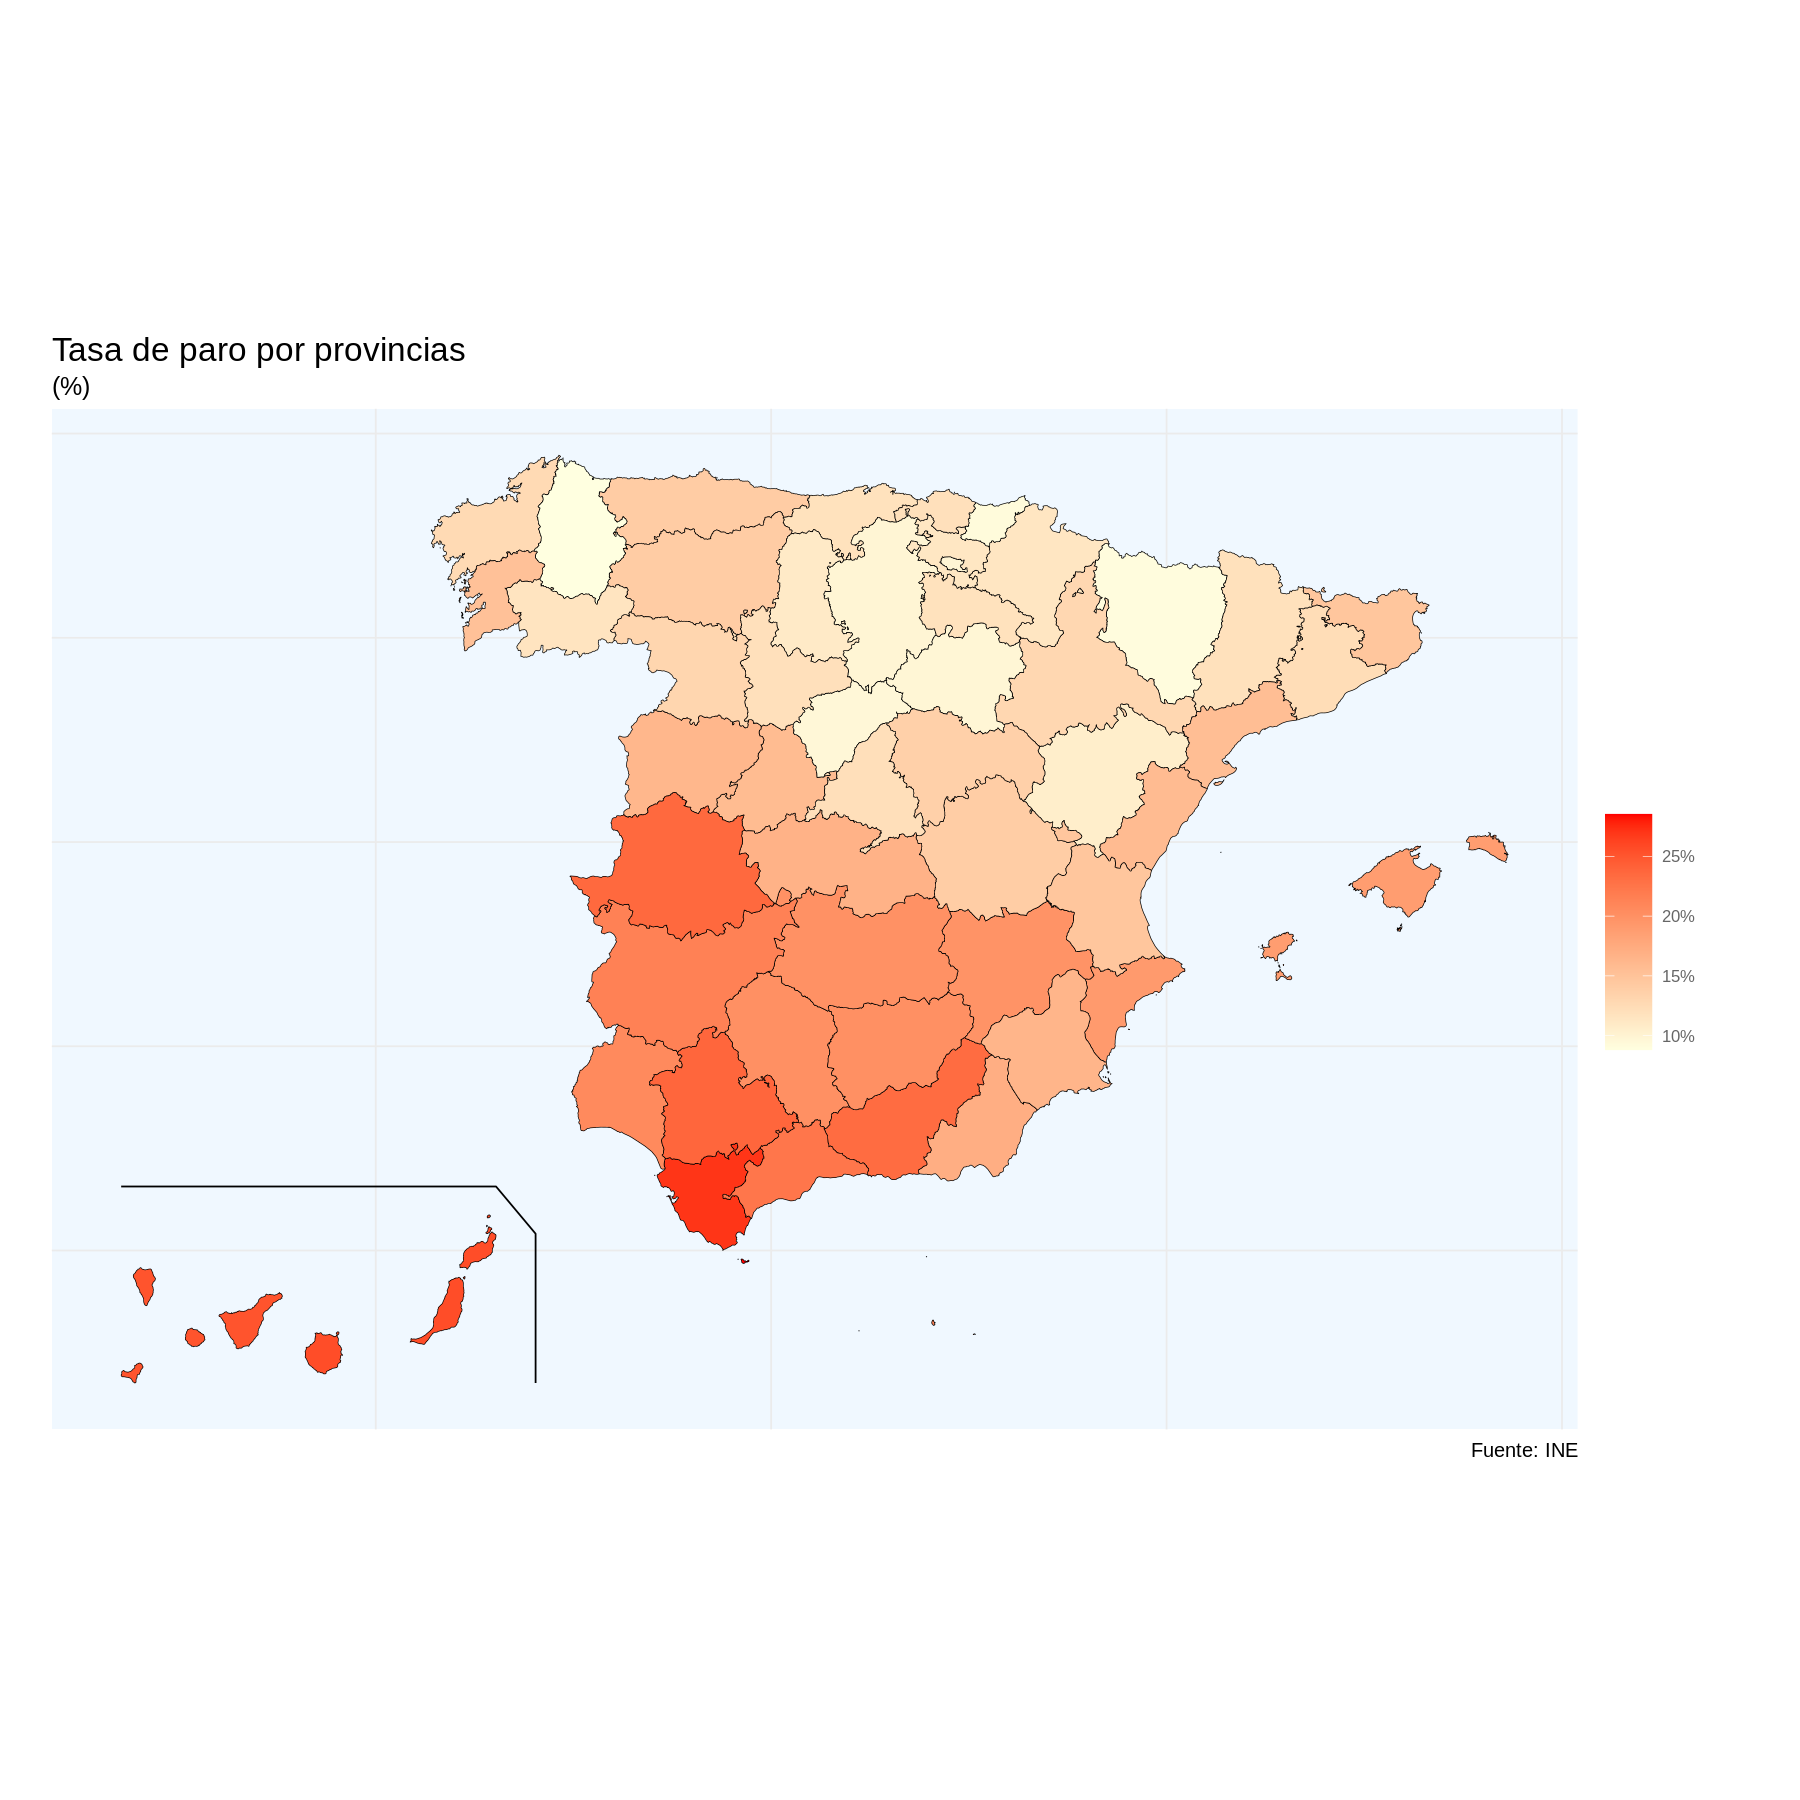

In [ ]:
mapa_provincias %>%

  ggplot() + #Iniciamos ggplot2 sin añadir nada

  geom_sf(aes(fill = Tasa_Paro/100), color= "black", size = 0.2) +  #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
  
  geom_sf(data = can_box) + #Añadimos la caja que contiene las islas Canarias

  labs( title = "Tasa de paro por provincias", #Títulos y subtítulos
        subtitle = "(%)",
        caption = "Fuente: INE",
        fill = "") + #Título de la leyenda

  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
  theme(
    axis.line = element_blank(),     #Línea de recuadro del mapa
    axis.text = element_blank(),     #Hemos quitado la información de latitud y longitud porque no tenía mucho sentido, al haber movido las Canarias
    axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
    #axis.ticks = element_blank(),
    #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
    panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
    plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
    plot.subtitle = element_text(size = 15, hjust = 0),
    plot.caption = element_text(size = 12, hjust = 1),
    legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
    #legend.title = element_text(color = "grey40", size = 15),
    legend.text = element_text(color = "grey40", size = 10, hjust = 0), #Tamaño texto de la leyenda
    #legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
    plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

  scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

  ggsave("Tasa de paro por provincias con las Canarias acercadas con mapSpain.png", plot = last_plot()) #Guardamos la imagen en el cuaderno de Colab por si queremos descargarla

La unión del `mapa_provincias` con el dataframe `datos_Tasa_Paro` se realizó correctamente, ya que vemos que la distribución de la tasa de paro por provincias es la misma que la mostrada en los anteriores mapas.

##Truco: Dos mapas o más en una misma figura

A continuación mostraremos cómo dibujar un mapa al lado de otro, aunque también daremos las pistas para dibujar más de dos mapas.

Vamos a representar el mapa creado en el anterior apartado (a la izquierda) y, para mostrar otros datos diferentes a la derecha, vamos a mostrar la tasa de ocupación (que no es más que el contrario de la tasa de paro).

Los datos de la tasa de ocupación por provincias los hemos obtenido del siguiente [enlace](https://www.ine.es/jaxiT3/Datos.htm?t=9122). [De nuevo, es posible que al entrar en el enlace no salga directamente la tabla con dicha tasa de paro, pero podemos buscarla fácilmente clicando en *Resultados provinciales* > *Población en viviendas familiares (incluye parados)* > *Población de 16 y más años por relación con la actividad económica, sexo y provincia*. Llegamos así a una página que nos permitirá construir nuestra tabla para descargar.]

Leemmos el archivo con los datos de ocupación como ya hicimos con los datos de paro más arriba:

In [ ]:
datos_Tasa_Ocupacion <- read.csv("Tasa_Ocupación_Provincias.csv", sep=";", dec=",", fileEncoding="latin1")
datos_Tasa_Ocupacion <- rename(datos_Tasa_Ocupacion, Tasa_Ocupacion = Total)
datos_Tasa_Ocupacion <- separate(data=datos_Tasa_Ocupacion, col=Provincias, into=c("Codigo", "Provincia"), sep=" ")
datos_Tasa_Ocupacion <- datos_Tasa_Ocupacion[, c("Codigo", "Tasa_Ocupacion")]
head(datos_Tasa_Ocupacion)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 6 rows [8, 16, 18, 36, 38, 40].”


,Codigo,Tasa_Ocupacion
,<chr>,<dbl>
1,02,80.2
2,03,80.8
3,04,82.9
4,01,88.7
5,33,85.9
6,05,84.2


Vamos a ejemplificar cómo dibujar un mapa al lado de otro usando el mapa que hemos creado justo arriba con `mapSpain`. 

A dicho mapa, al que llamamos `mapa_provincias`, debemos añadirle los datos de ocupación provinciales, como ya hicimos con los datos de paro:

In [ ]:
mapa_provincias <- left_join(mapa_provincias, datos_Tasa_Ocupacion, by="Codigo")

Para poder dibujar un mapa al lado de otro, vamos a utilizar la función `plot_grid()` de la librería `cowplot`, por lo que, lo primero que vamos a hacer es cargar dicha librería:

In [ ]:
install.packages("cowplot")
library(cowplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A continuación, creamos los dos mapas. El procedimiento es el siguiente:
1. Con `options()` vamos a cambiar el tamaño que tendrá la figura, indicando el doble una anchura de la que estábamos usando hasta ahora. Si no hacemos esto, al estar dibujando dos mapas, se verán muy pequeñitos.
2. Creamos un mapa, con el mismo código de R que hemos empleado anteriormente, y lo incluimos dentro de una variable de R. En este caso, por ejemplo, creamos primero el mapa de la tasa de paro provincial y guardamos la información en una variable llamada `mapa_Tasa_Paro`.
3. Repetimos el paso anterior, pero con otros datos: la tasa de ocupación en nuestro caso. La información la guardamos en la variable `mapa_Tasa_Ocupacion`.
4. Usamos la función `plot_grid()` de la siguiente manera: `plot_grid(mapa_Tasa_Paro, mapa_Tasa_Ocupacion)`. De esta forma, el mapa sobre la tasa de paro aparecerá a la izquierda y el otro, a la derecha. Si quisiéramos poner uno encima de otro, deberíamos especificar la opción `ncol = 1` dentro de la función `plot_grid()`.

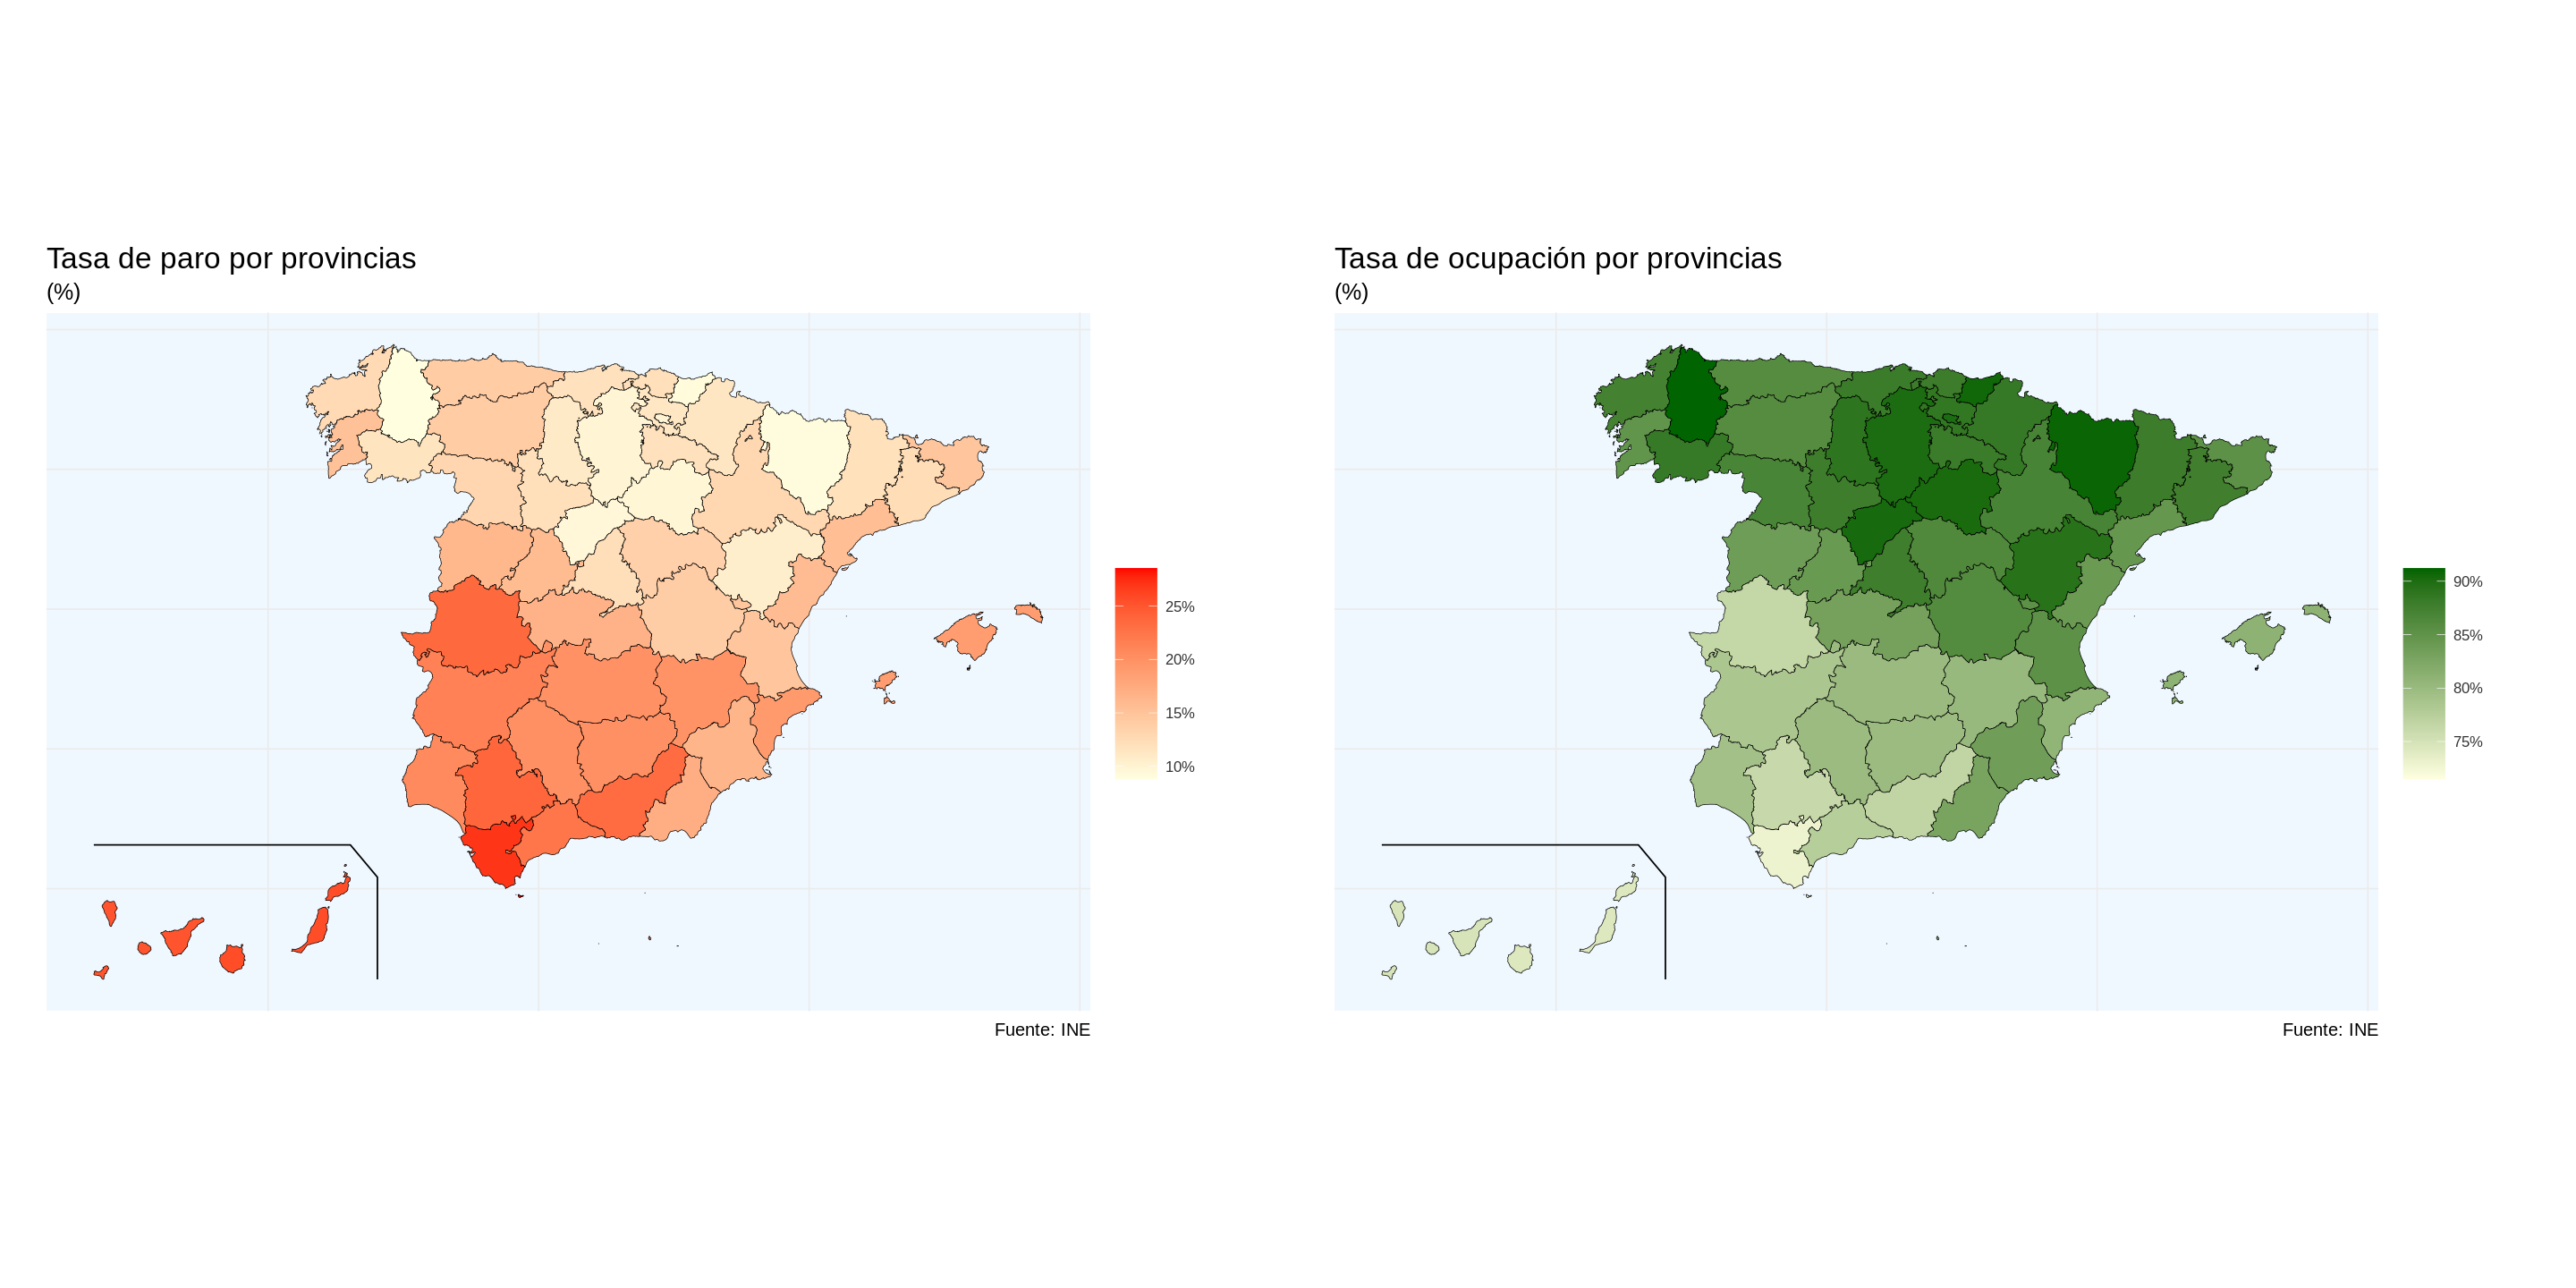

In [ ]:
options(repr.plot.width=24, repr.plot.height=12)

mapa_Tasa_Paro <- ggplot(mapa_provincias) + #Iniciamos ggplot2 

                  geom_sf(aes(fill = Tasa_Paro/100), color= "black", size = 0.2) +  #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
  
                  geom_sf(data = can_box) + #Añadimos la caja que contiene las islas Canarias

                  labs(title = "Tasa de paro por provincias", #Títulos y subtítulos
                       subtitle = "(%)",
                       caption = "Fuente: INE",
                       fill = "") + #Título de la leyenda

                  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

                  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
                  theme(
                        axis.line = element_blank(),     #Línea de recuadro del mapa
                        axis.text = element_blank(),     #Hemos quitado la información de latitud y longitud porque no tenía mucho sentido, al haber movido las Canarias
                        axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
                       #axis.ticks = element_blank(),
                       #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
                        panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
                        plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
                        plot.subtitle = element_text(size = 15, hjust = 0),
                        plot.caption = element_text(size = 12, hjust = 1),
                        legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
                       #legend.title = element_text(color = "grey40", size = 15),
                        legend.text = element_text(color = "grey20", size = 10, hjust = 0), #Tamaño texto de la leyenda
                       #legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
                        plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

                 scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

mapa_Tasa_Ocupacion <- ggplot(mapa_provincias) + #Iniciamos ggplot2 

                       geom_sf(aes(fill = Tasa_Ocupacion/100), color= "black", size = 0.2) +  #fill: variable que queremos representar en el mapa (dividimos entre 100, porque la opción scales::percent que cierra este bloque, multiplica por 100)
  
                       geom_sf(data = can_box) + #Añadimos la caja que contiene las islas Canarias

                       labs(title = "Tasa de ocupación por provincias", #Títulos y subtítulos
                            subtitle = "(%)",
                            caption = "Fuente: INE",
                            fill = "") + #Título de la leyenda

                       xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

                       theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
                       theme(
                             axis.line = element_blank(),     #Línea de recuadro del mapa
                             axis.text = element_blank(),     #Hemos quitado la información de latitud y longitud porque no tenía mucho sentido, al haber movido las Canarias
                             axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
                            #axis.ticks = element_blank(),
                            #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
                            panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
                            plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
                            plot.subtitle = element_text(size = 15, hjust = 0),
                            plot.caption = element_text(size = 12, hjust = 1),
                            legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
                           #legend.title = element_text(color = "grey40", size = 15),
                            legend.text = element_text(color = "grey20", size = 10, hjust = 0), #Tamaño texto de la leyenda
                           #legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
                            plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

                       scale_fill_gradient(low = "lightyellow", high = "darkgreen", labels = scales::percent) #Escala de colores de la leyenda

plot_grid(mapa_Tasa_Paro, mapa_Tasa_Ocupacion)

Para descargarnos estos mapas en una sola imagen, no podemos hacer uso de la función `ggsave()` que estábamos utilizando hasta ahora - ya que no arrojará resultados satisfactorios -, sino que debemos emplear la función `save_plot()` también del paquete `cowplot`.

En este caso, es crucial indicar que el número de columnas es 2:

In [ ]:
dos_mapas <- plot_grid(mapa_Tasa_Paro, mapa_Tasa_Ocupacion)
save_plot("Dos mapas.png", dos_mapas, ncol = 2)

Al ejecutar dichas líneas se nos guardará la imagen en nuestro cuaderno de R, la cual podremos descargar en nuestro ordenador realizando el paso que hemos explicado más arriba.

##Truco: cómo añadir más capas a un mapa

En ocasiones, podemos tener la necesidad de añadir más de una capa a un mapa. Por ejemplo, podríamos querer añadir una capa base a los mapas que hemos hecho hasta ahora que contenga información de los mares, océanos y países que rodean a España, para que no parezca que el mapa está flotando en el aire cuando lo representamos. Para ejemplificar esta idea, vamos a añadir al mapa que creamos con la librería `sf` dos capas más: una capa de agua (que contiene todos los mares y océanos del planeta) y una capa con límites políticos de todos los países del mundo. La capa de agua la hemos descargado de este [enlace](https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/), y la de países de este [otro](https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about).

Como hicimos con las capas de las Canarias y del resto del territorio nacional, una vez descargadas las capas de agua y países en nuestro ordenador, las subimos manualmente a nuestro cuaderno de Colab. Y una vez subidos todos los archivos referentes a estas capas a Colab, leemos los archivos `.shp` correspondientes haciendo uso de la función de lectura del paquete `sf`:

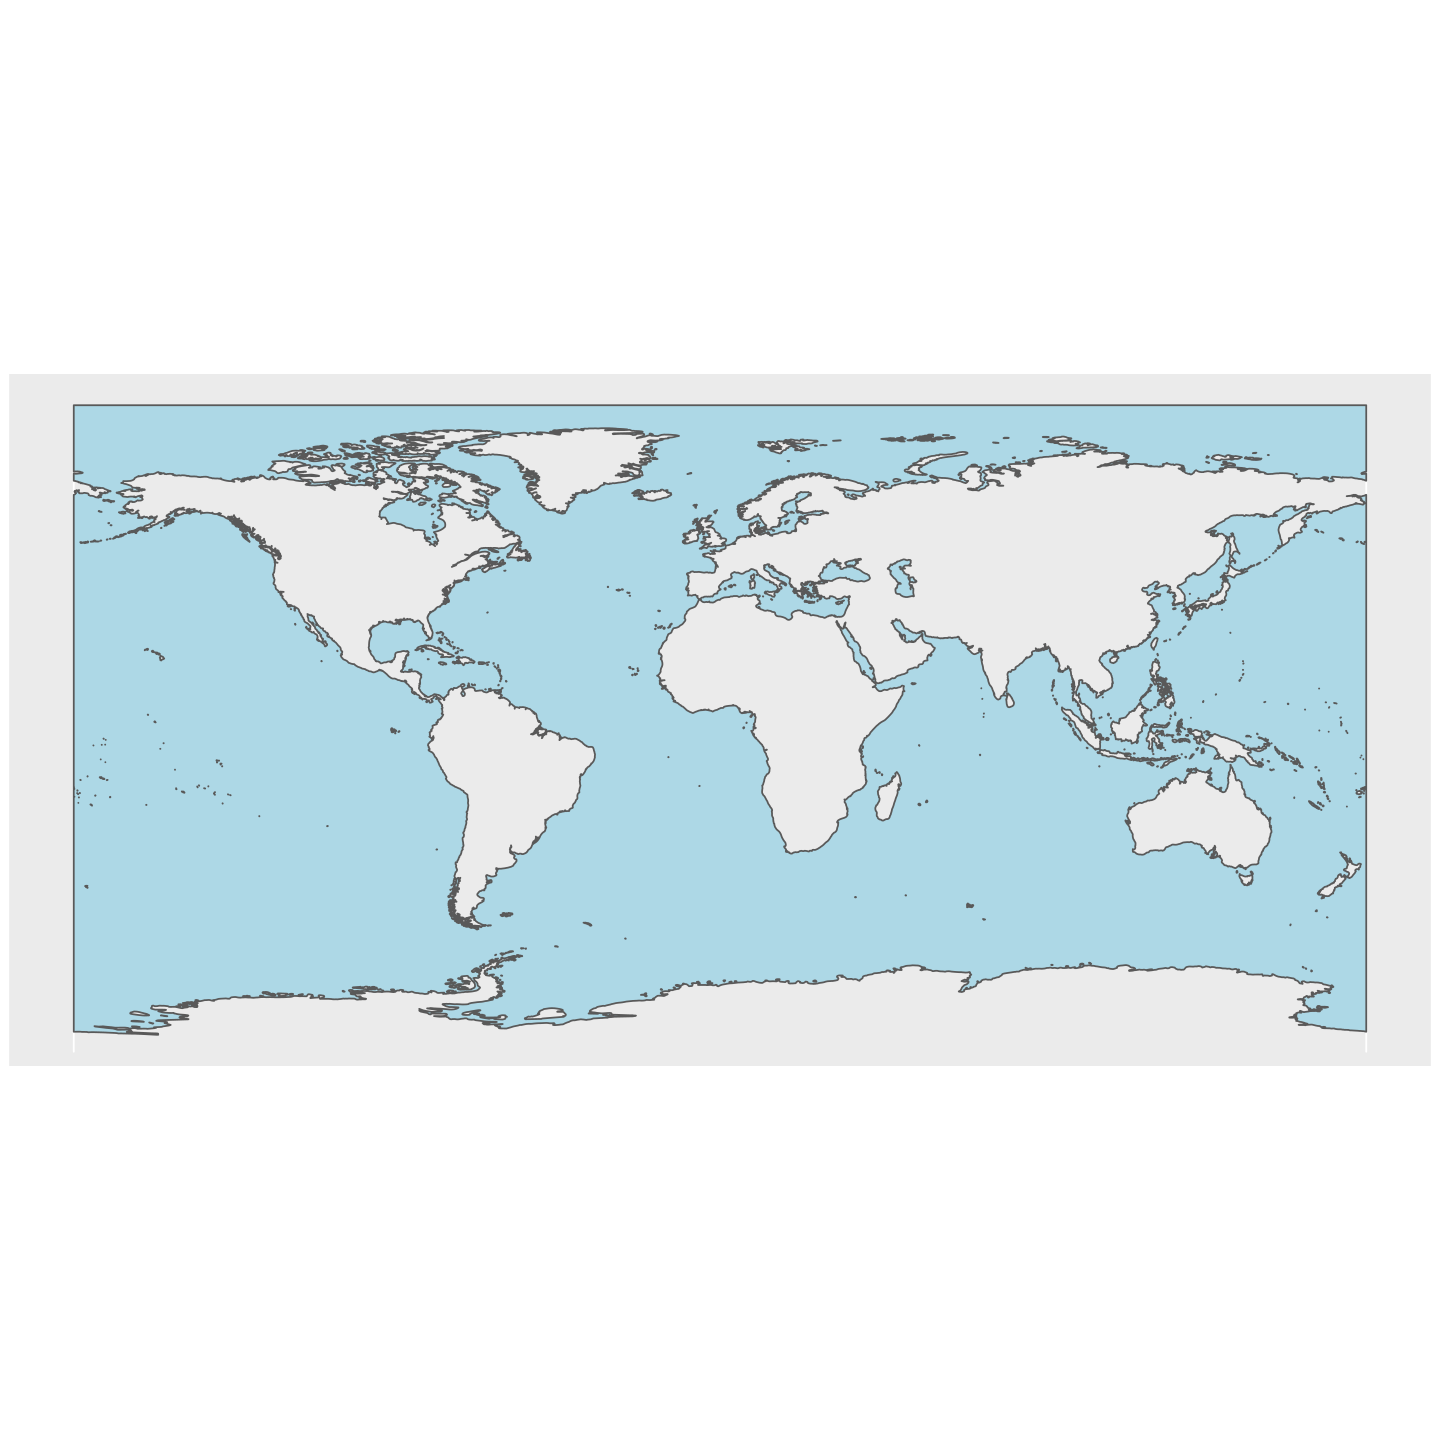

In [ ]:
#Cambiamos de nuevo el tamaño de la imagen:
options(repr.plot.width=12, repr.plot.height=12)

#Capa de mares y océanos:
Oceanos_sf <- read_sf("ne_50m_ocean.shp")
Oceanos_sf %>%
  ggplot() + #Abrimos ggplot2
  geom_sf(fill="lightblue")  #Y le añadimos una geometría sf

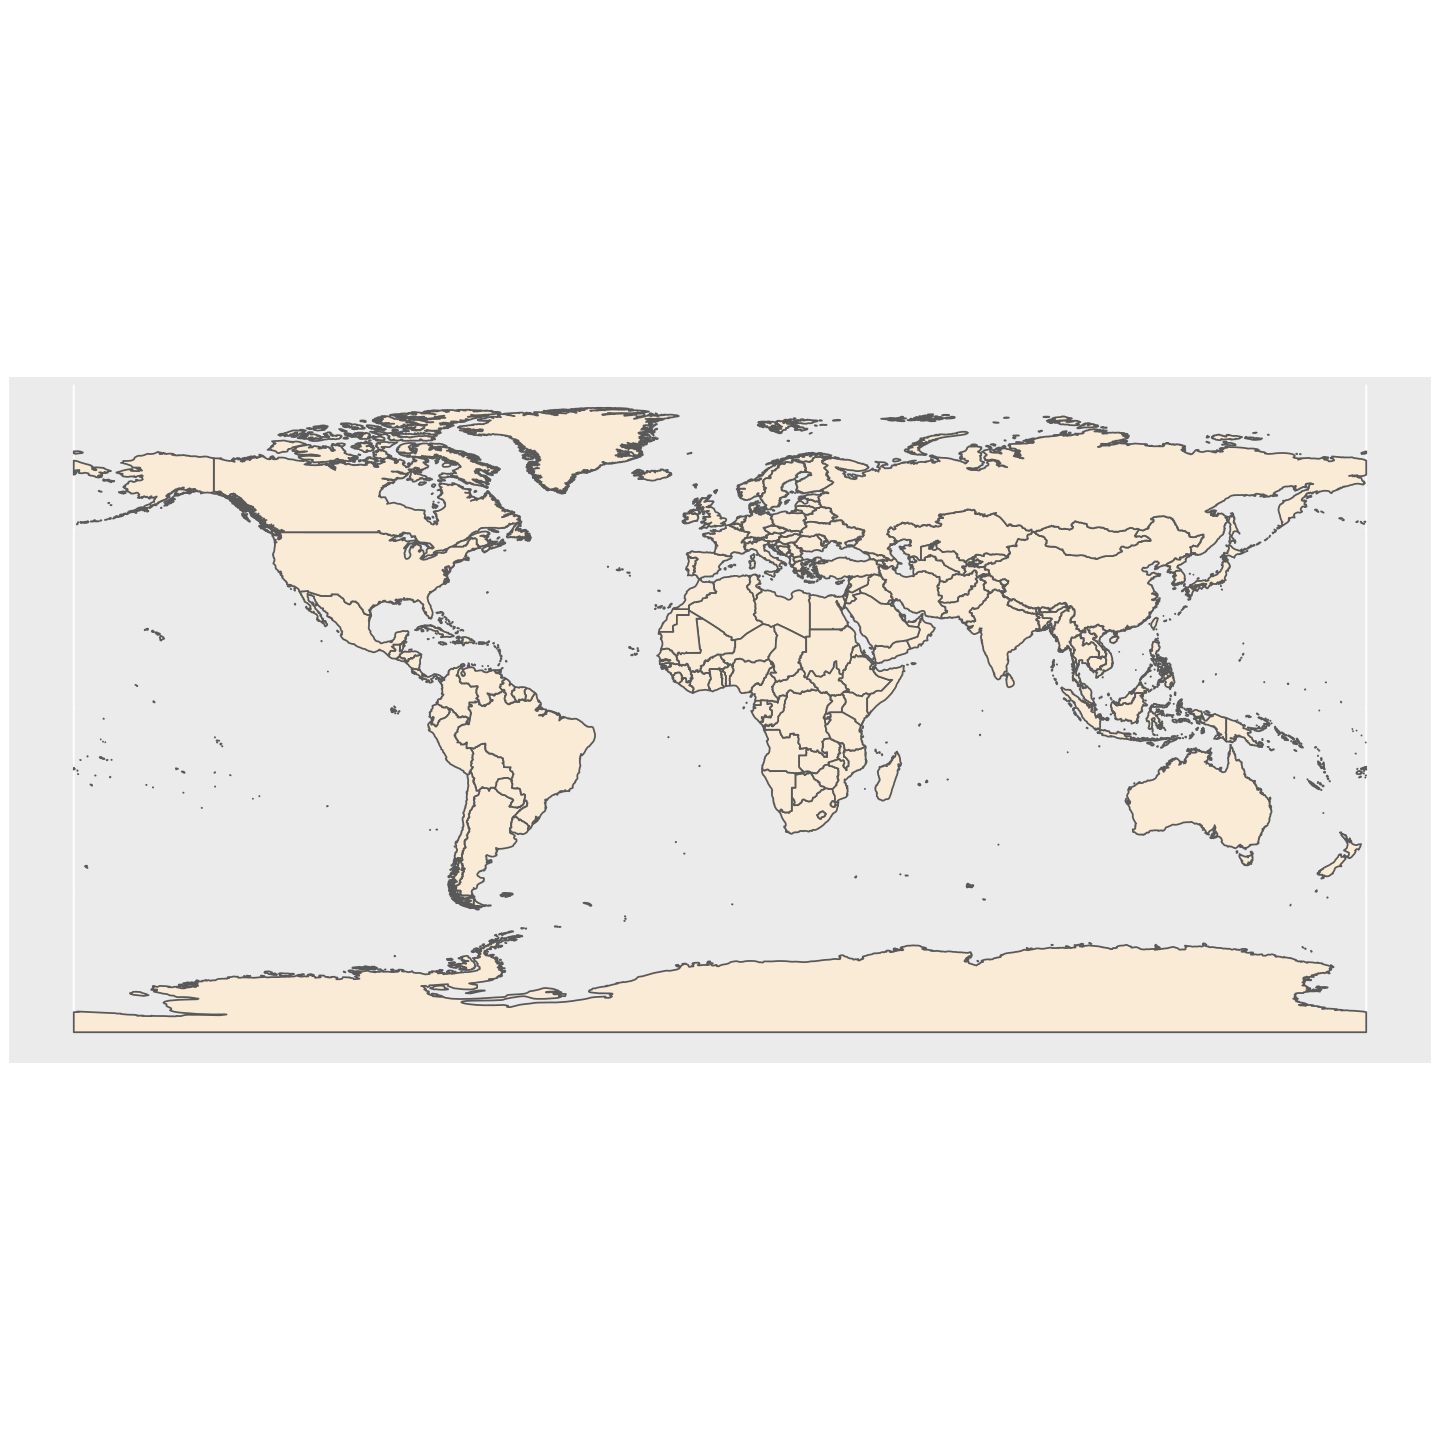

In [ ]:
#Capa de países:
Paises_sf <- read_sf("Mapa_paises_mundo.shp")
Paises_sf %>%
  ggplot() + #Abrimos ggplot2
  geom_sf(fill="antiquewhite")  #Y le añadimos una geometría sf

Al dibujar las dos capas anteriores, como esperábamos, nos muestran un mapamundi. Esto es importante recalcarlo ya que, cuando superpongamos nuesta capa de España, deberemos especificar unas coordenadas de latitud y longitud para que R haga zoom al mapa de España, y no se vea el mapamundi entero. Las coordenadas de España van aproximadamente de los 19ºO a 7ºE (longitud, eje x) y de los 27ºN a los 46ºN (latitud, eje Y). Dichas coordenadas las especificaremos con la función `coord_sf()`.

Por otro lado la función que nos permite introducir una nueva capa en el mapa es la función `geom_sf()`, que ya hemos utilizado anteriormente. Debemos utilizar esta función tantas veces como capas deseamos añadir. En nuestro caso, como queremos añadir tres capas: mapa de España, mapa de mares y océanos, y mapa de países, tendremos que usar `geom_sf()` en tres ocasiones.

Asimismo, resulta fundamental el orden en que introduzcamos las capas: las primera capa que indiquemos en nuestro código será la que aparezca más abajo del mapa, y las siguientes se irán superponiendo. Por ello, debemos añadir la capa del mapa de España después de la del mapamundi de límites de países, pues, si no lo hiciésemos así, como el mapamundi también incluye el mapa de España, esta capa ocultaría la capa de España con la información de las tasas de paro provinciales.

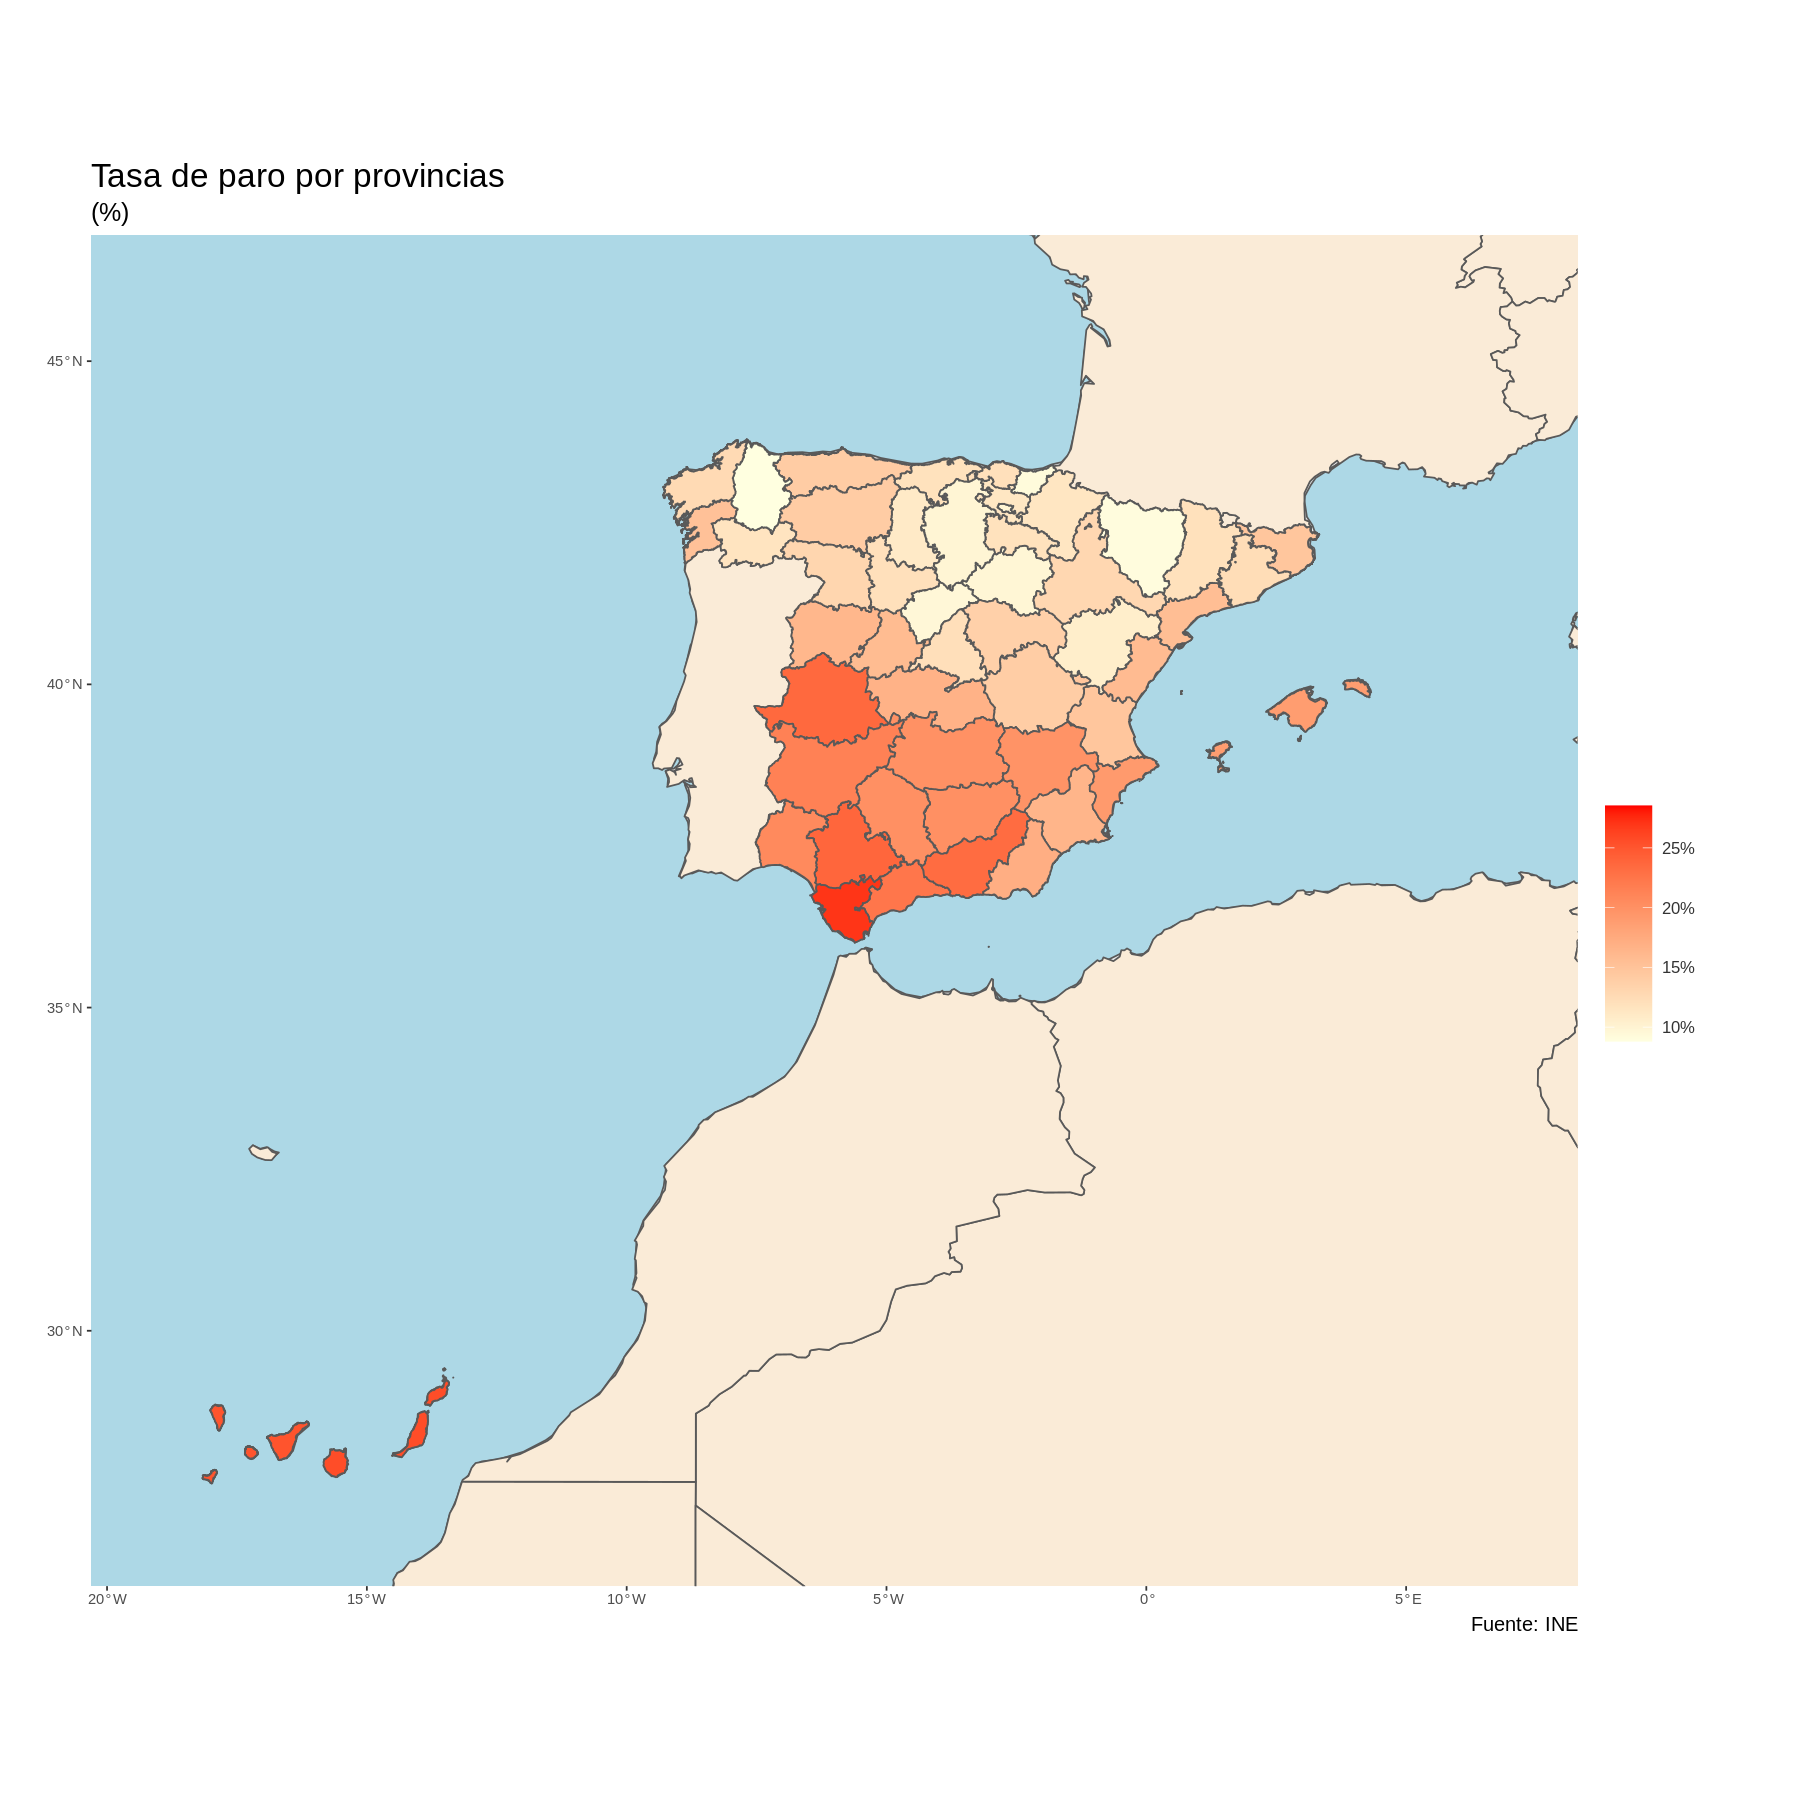

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)

ggplot() + #abrimos ggplot2

geom_sf(data=Oceanos_sf, fill="lightblue") + #Añadimos la capa de mares y océanos

geom_sf(data=Paises_sf, fill="antiquewhite") + #Añadimos la capa de países

geom_sf(data=mapa_Tasa_Paro_sf, aes(fill = Tasa_Paro/100), size = 0.5) + #Añadimos la capa de España, como hemos hecho anteriormente

labs(title = "Tasa de paro por provincias", #Títulos y subtítulos
     subtitle = "(%)",
     caption = "Fuente: INE",
     fill = "") + #Título de la leyenda

xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

coord_sf(xlim = c(-19, 7), ylim = c(27, 46)) + #Especificamos unas coordenadas sobre las que hacer zoom

#theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2) [Ya no nos interesa el color de fondo, pues tenemos el fondo cubierto con las capas de agua y países]
  
theme(
      axis.line = element_blank(),     #Línea de recuadro del mapa
     #axis.text = element_blank(),     Si queremos que no aparezca información sobre las coordenadas de latitud y longitud, debemos quitar la #
      axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
     #axis.ticks = element_blank(),
     #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
     #panel.background = element_rect(fill= "aliceblue", color = NA),  [Ya no nos interesa el color de fondo, pues tenemos el fondo cubierto con las capas de agua y países]
     plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
     plot.subtitle = element_text(size = 15, hjust = 0),
     plot.caption = element_text(size = 12, hjust = 1),
     legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
     #legend.title = element_text(color = "grey40", size = 15),
     legend.text = element_text(color = "grey20", size = 10, hjust = 0), #Tamaño texto de la leyenda
     #legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
     plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda

Y nos descargamos la imagen haciendo uso de `ggsave()`:

In [ ]:
  ggsave("Mapa con tres capas.png", plot = last_plot()) #Guardamos la imagen en el cuaderno de Colab por si queremos descargarla

Saving 6.67 x 6.67 in image



Otra opción que tenemos para realizar lo anterior es usar el paquete `mapSpain`. Este paquete nos permite añadir una capa base sin necesidad de cargar nueva información geográfica. Para ello, junto con dicho paquete, debemos cargar los siguientes dos:

In [ ]:
install.packages("slippymath")
library(slippymath)
install.packages("tidyterra")
library(tidyterra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘terra’, ‘raster’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A continuación, para ejemplificar cómo hacerlo, vamos a crear, como ya hicimos al usar `mapSpain` para acercar las Canarias a la península Ibérica, un mapa de las provincias españolas que contenga la información de la tasa de paro provincial. Sin embargo, en este caso, no vamos a acercar las islas Canarias haciendo `moveCAN = F`

In [ ]:
mapa_provincias <- esp_get_prov(moveCAN=F)
mapa_provincias <- rename(mapa_provincias, Codigo = cpro)
mapa_provincias <- left_join(mapa_provincias, datos_Tasa_Paro, by="Codigo")

La función de `mapSpain` que permite añadir una capa base es `esp_getTiles`. Esta función ofrece una gran variedad de capas bases que podemos utilizar (las podemos encontrar en este [enlace](https://www.rdocumentation.org/packages/mapSpain/versions/0.4.0/topics/leaflet.providersESP.df)).

Nosotros vamos a utilizar una capa del PNOA (Plan Nacional de Ortografía Aérea), que nos proporcionará una visión fotogramétrica del territorio nacional español y alrededores. La capa base creada con `esp_getTiles`luego la pasamos a `ggplot2` con la función `geom_spatraster_rgb()`. El resto del código es igual al que hemos usado anteriormente para el mapa creando con `mapSpain`:

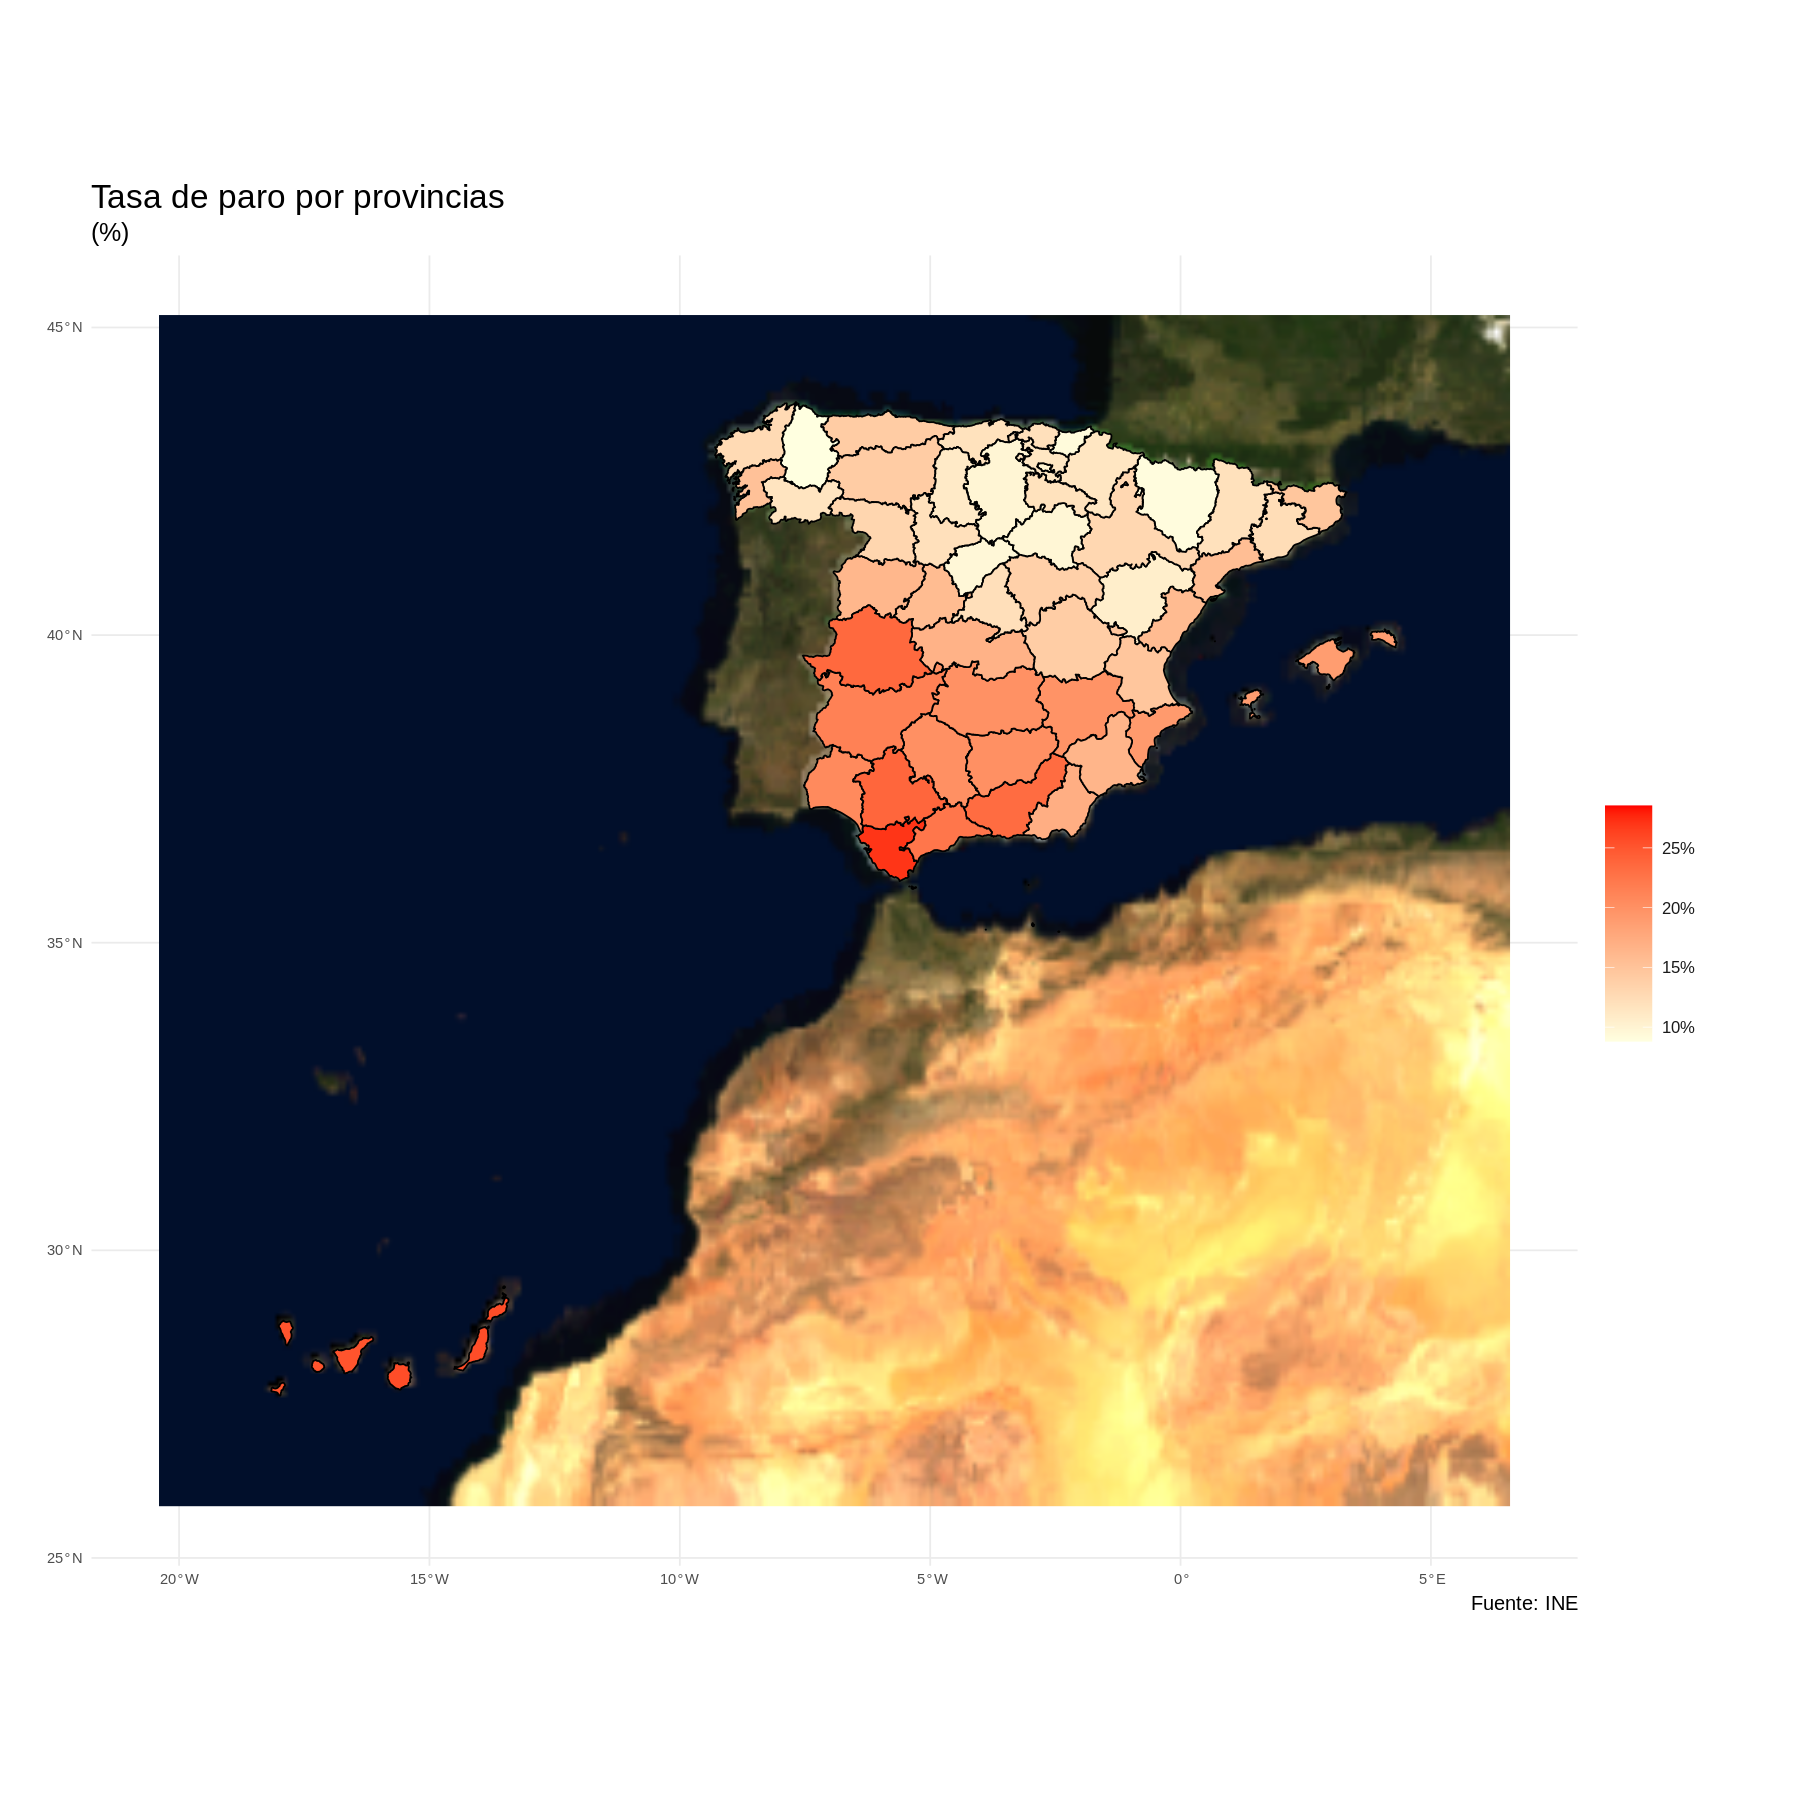

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)

base_pnoa <- esp_getTiles(mapa_provincias, "PNOA", bbox_expand = 0.2) #La opción bbox_expand permite aumentar los márgenes de la imagen de España tomada del PNOA

ggplot() +

  geom_spatraster_rgb(data = base_pnoa) +

  geom_sf(data = mapa_provincias, aes(fill = Tasa_Paro/100), color = "black") +

  labs( title = "Tasa de paro por provincias", #Títulos y subtítulos
        subtitle = "(%)",
        caption = "Fuente: INE",
        fill = "") + #Título de la leyenda

  xlab("Longitud") + ylab("Latitud") + #Nombres de los ejes

  theme_minimal() + #Tema de fondo (existen diferentes temas de fondo en ggplot2)
  
  theme(
    axis.line = element_blank(),     #Línea de recuadro del mapa
    #axis.text = element_blank(),    
    axis.title = element_blank(),    #Si queremos que aparezcan los nombres de los ejes, debemos comentar esta línea
    #axis.ticks = element_blank(),
    #plot.background = element_rect(fill = "snow", color = NA), #Color de fondo panel (lo que queda fuera del contorno del mapa) Si queremos que sea del mismo color que el fondo del mapa, quitar la #
    #panel.background = element_rect(fill= "aliceblue", color = NA),  #Color de fondo mapa 
    plot.title = element_text(size = 20, hjust = 0),            #Tamaño de los títulos
    plot.subtitle = element_text(size = 15, hjust = 0),
    plot.caption = element_text(size = 12, hjust = 1),
    legend.key.size = unit(1, "cm"), #Tamaño de la leyenda 
    #legend.title = element_text(color = "grey40", size = 15),
    legend.text = element_text(color = "grey10", size = 10, hjust = 0), #Tamaño texto de la leyenda
    #legend.position = c(0.93, 0.3), #Posición de la leyenda: primer parámetro: cuanto más cercano a 1, más a la derecha; segundo parámetro: cuando más cercano a 1, más arriba.
    plot.margin = unit(c(0.5,2,0.5,1), "cm")) + #Tamaño de los márgenes en cm

  scale_fill_gradient(low = "lightyellow", high = "red", labels = scales::percent) #Escala de colores de la leyenda


Y, finalmente, nos descargamos la imagen siguiendo el procedimiento habitual:

In [ ]:
ggsave("Mapa base con mapSpain.png", plot = last_plot()) #Guardamos la imagen en el cuaderno de Colab por si queremos descargarla

Saving 6.67 x 6.67 in image

